In [2022]:
# Data Cleaning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import time
import matplotlib as mpl
import matplotlib.dates as mdates
import datetime as dt
import statsmodels.api as sm
import scipy.stats as st
import missingno as msno
import re
import math
import collections

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve, auc, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from matplotlib import rcParams
from matplotlib import gridspec
from sklearn import linear_model
from IPython.display import display
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from collections import Counter
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
%matplotlib inline

# params
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [2023]:
df = pd.read_csv('/Users/talia/Desktop/Chronic_Deseases /maladies_chroniques.csv',delimiter=';')
df.head()

,type,varTaux,varTauxLib,I_cat,cat,catLib,varPartition,valPartition,varGroupage,valGroupage,varPoids,poids1,poidsTot,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
0,prevalence,TOP_CVAOMI_IND,Artériopathie oblitérante du membre inférieur,0,SUP_CV_CAT,Maladies cardioneurovasculaires,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,13621.00,1374418.26,0.01,0.01,0.01,0.02,0.01,0.01,0.02
1,prevalence,TOP_CVCORON_CHR,Maladie coronaire chronique,0,SUP_CV_CAT,Maladies cardioneurovasculaires,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,30886.50,1374418.26,0.02,0.03,0.03,0.03,0.03,0.03,0.03
2,prevalence,TOP_CVVALVE_IND,Maladie valvulaire,0,SUP_CV_CAT,Maladies cardioneurovasculaires,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,6482.67,1374418.26,0.00,0.01,0.01,0.01,0.01,0.01,0.01
3,prevalence,TOP_IRMMHER_IND,Maladies métaboliques héréditaires ou amylose,0,SUP_INFRARVIH_CAT,Maladies inflammatoires ou rares ou VIH ou SIDA,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,2080.35,1374418.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,prevalence,TOP_NAUTRES_IND,Autres affections neurologiques,0,SUP_NEUDEG_CAT,Maladies neurologiques ou dégénératives,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,4457.53,1374418.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [2024]:
df.rename(columns = {'type':'Type', 'varTauxLib':'Disease_Name', 'valPartition':'Region', 'varGroupage': 'Demographic', 'valGroupage': 'Demographic_Indicator',
                              'poids1':'weights', 'poidsTot':'weights_total','catLib':'Disease_Group'}, inplace = True)
df.head()

,Type,varTaux,Disease_Name,I_cat,cat,Disease_Group,varPartition,Region,Demographic,Demographic_Indicator,varPoids,weights,weights_total,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
0,prevalence,TOP_CVAOMI_IND,Artériopathie oblitérante du membre inférieur,0,SUP_CV_CAT,Maladies cardioneurovasculaires,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,13621.00,1374418.26,0.01,0.01,0.01,0.02,0.01,0.01,0.02
1,prevalence,TOP_CVCORON_CHR,Maladie coronaire chronique,0,SUP_CV_CAT,Maladies cardioneurovasculaires,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,30886.50,1374418.26,0.02,0.03,0.03,0.03,0.03,0.03,0.03
2,prevalence,TOP_CVVALVE_IND,Maladie valvulaire,0,SUP_CV_CAT,Maladies cardioneurovasculaires,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,6482.67,1374418.26,0.00,0.01,0.01,0.01,0.01,0.01,0.01
3,prevalence,TOP_IRMMHER_IND,Maladies métaboliques héréditaires ou amylose,0,SUP_INFRARVIH_CAT,Maladies inflammatoires ou rares ou VIH ou SIDA,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,2080.35,1374418.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,prevalence,TOP_NAUTRES_IND,Autres affections neurologiques,0,SUP_NEUDEG_CAT,Maladies neurologiques ou dégénératives,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,4457.53,1374418.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [2025]:
df1 = df.drop(['varPartition','varTaux','I_cat','cat','varPoids'], axis=1)
df1

,Type,Disease_Name,Disease_Group,Region,Demographic,Demographic_Indicator,weights,weights_total,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
0,prevalence,Artériopathie oblitérante du membre inférieur,Maladies cardioneurovasculaires,76,FISC_NIVVIEM_E2015_S_moy_10,1,13621.00,1374418.26,0.01,0.01,0.01,0.02,0.01,0.01,0.02
1,prevalence,Maladie coronaire chronique,Maladies cardioneurovasculaires,76,FISC_NIVVIEM_E2015_S_moy_10,1,30886.50,1374418.26,0.02,0.03,0.03,0.03,0.03,0.03,0.03
2,prevalence,Maladie valvulaire,Maladies cardioneurovasculaires,76,FISC_NIVVIEM_E2015_S_moy_10,1,6482.67,1374418.26,0.00,0.01,0.01,0.01,0.01,0.01,0.01
3,prevalence,Maladies métaboliques héréditaires ou amylose,Maladies inflammatoires ou rares ou VIH ou SIDA,76,FISC_NIVVIEM_E2015_S_moy_10,1,2080.35,1374418.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,prevalence,Autres affections neurologiques,Maladies neurologiques ou dégénératives,76,FISC_NIVVIEM_E2015_S_moy_10,1,4457.53,1374418.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46171,prevalence,Myopathie ou myasthénie,Maladies neurologiques ou dégénératives,M,classeAge10,>=90,386.87,396688.72,0.00,0.00,0.00,0.00,0.00,0.00,0.00
46172,prevalence,Traitements neuroleptiques,Traitements psychotropes,M,classeAge10,>=90,11034.31,396688.72,0.03,0.03,0.03,0.03,0.03,0.03,0.03
46173,prevalence,Troubles névrotiques et de l’humeur,Maladies psychiatriques,M,classeAge10,>=90,29337.25,396688.72,0.07,0.07,0.07,0.08,0.07,0.07,0.08
46174,prevalence,Dialyse chronique,Insuffisance rénale chronique terminale,M,classeAge10,>=90,1783.66,396688.72,0.00,0.00,0.00,0.01,0.00,0.00,0.01


In [2026]:
new_columns_order = ["Type", "Disease_Name", "Disease_Group", "Region", "Demographic", "Demographic_Indicator", "weights", "weights_total", "txNonStand","txStandDir","txStandDirModBB","txStandDirModBH","txStandIndir","txStandIndirModBB","txStandIndirModBH"]
data = df1[new_columns_order]

data.head()

,Type,Disease_Name,Disease_Group,Region,Demographic,Demographic_Indicator,weights,weights_total,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
0,prevalence,Artériopathie oblitérante du membre inférieur,Maladies cardioneurovasculaires,76,FISC_NIVVIEM_E2015_S_moy_10,1,13621.00,1374418.26,0.01,0.01,0.01,0.02,0.01,0.01,0.02
1,prevalence,Maladie coronaire chronique,Maladies cardioneurovasculaires,76,FISC_NIVVIEM_E2015_S_moy_10,1,30886.50,1374418.26,0.02,0.03,0.03,0.03,0.03,0.03,0.03
2,prevalence,Maladie valvulaire,Maladies cardioneurovasculaires,76,FISC_NIVVIEM_E2015_S_moy_10,1,6482.67,1374418.26,0.00,0.01,0.01,0.01,0.01,0.01,0.01
3,prevalence,Maladies métaboliques héréditaires ou amylose,Maladies inflammatoires ou rares ou VIH ou SIDA,76,FISC_NIVVIEM_E2015_S_moy_10,1,2080.35,1374418.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,prevalence,Autres affections neurologiques,Maladies neurologiques ou dégénératives,76,FISC_NIVVIEM_E2015_S_moy_10,1,4457.53,1374418.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [2027]:
class dataProfiling:

    def moreInfo(self, data):
        # more data info
        print(f"MORE DATA INFO :")
        print("-" * 109)

        print(f"Data shape : {data.shape}\n")

        # counts no. of rows
        print(f"Total rows in the dataset : {len(data):,}")

        # counts no. of columns
        print(f"Total columns in the dataset : {len(data.columns):,}")

        # counts no. of duplicates
        print(f"Total duplicated values : {str(data.duplicated().sum())}")

        # counts no. of missing values
        print(f"Total null values : {data.isnull().sum().sum():,}")

        # compute missing/duplicates ratio
        print(f"\nRATIO OF MISSING AND DUPLICATED VALUES IN OUR DATA :")
        print("-" * 109)

        # ratio for missing values
        isnull_ratio = (data.isnull().sum().sum() / len(data)) * 100

        # ratio for duplicated values
        dup_ratio = (data.duplicated().sum() / len(data)) * 100

        # return results
        print(f"\nPercentage of null values in the data : {round(isnull_ratio, 2)}%")
        print(f"Percentage of duplicates in the data : {round(dup_ratio, 2)}%")
        print("\n")

    def valueCounts(self, data):
        # count no. of values per column
        print(f"\nCOUNT VALUES FOR EACH COLUMN :")
        print("-" * 109)
        for column in data.columns:
            countValues = data[column].value_counts(dropna=False).to_frame()
            totalValues = data[column].count()
            print(f"VALUE_COUNTS for column '{column}' : {len(countValues)} rows, {totalValues} values in Total\n")
            display(countValues)
            print("-" * 109)

    def nullColumn(self, data):
        # displays no. of missing values per column
        print(f"\nTOTAL MISSING VALUES FOR EACH COLUMN :")
        display(data.isnull().sum().to_frame().rename(columns={0: "MISSING VALUES"}))
        print("\n")

    def visualizeNull(self, data):
        # visualize missing values
        print(f"VISAULIZE MISSNG VALUES :")
        print("-" * 109)

        # method 1
        print("METHOD 1")
        sns.heatmap(data.isnull().T,
                    xticklabels=False,
                    cmap="viridis",
                    cbar_kws={"label": "Missing Values"})

        plt.tight_layout()
        plt.show()
        print("\n")

        # method 2
        print("METHOD 2")
        plt.imshow(data.isna(), aspect="auto", interpolation="nearest", cmap="gray")
        plt.xlabel("Column Number")
        plt.ylabel("Sample Number");
        print("\n")

    def nullData(self, data):
        # displays rows where missing values are found
        print(f"DISPLAYS ROWS WHERE MISSING VALUES ARE FOUND :")
        display(data[data.isnull().any(axis=1)])
        print("\n")

    def descriptiveData(self, data):
        # do quick descriptive statistics
        print(f"QUICK DESCRIPTIVE ANALYSIS :")
        print("-" * 109)
        display(data.describe())
        print("\n")

    def nonNumericStats(self, data):
        # categorical statistics
        print(f"NON-NUMERICAL STATISTICS :")
        print("-" * 109)
        display(data.describe(exclude="number"))
        print("\n")

    def uniqueColumn(self, data):
        # view all unique values for each column
        print(f"UNIQUE VALUES FOR EACH COLUMN :")
        print("-" * 109)

        for column in data.columns:
            uniqueValues = data[column].unique()
            uniqueCount = data[column].nunique()
            print(f"UNIQUE VALUES for column '{column}' : {len(uniqueValues)} including NaN values, {uniqueCount} excluding Nan values\n")
            print(f"{uniqueValues}\n")
            print("-" * 109)
            
# instance of the dataProfiling class
profiler = dataProfiling()

In [2028]:
profiler.uniqueColumn(data)

UNIQUE VALUES FOR EACH COLUMN :
-------------------------------------------------------------------------------------------------------------
UNIQUE VALUES for column 'Type' : 2 including NaN values, 2 excluding Nan values

['prevalence' 'incidence']

-------------------------------------------------------------------------------------------------------------
UNIQUE VALUES for column 'Disease_Name' : 52 including NaN values, 52 excluding Nan values

['Artériopathie oblitérante du membre inférieur'
 'Maladie coronaire chronique' 'Maladie valvulaire'
 'Maladies métaboliques héréditaires ou amylose'
 'Autres affections neurologiques' "Démences (dont maladie d'Alzheimer)"
 'Maladie de Parkinson' 'Paraplégie'
 "Traitements antidépresseurs ou régulateurs de l'humeur"
 'Traitements hypnotiques' 'Déficience mentale' 'Dialyse chronique'
 'Suivi de transplantation rénale' 'Cancers'
 'Maladies cardioneurovasculaires' 'Traitements du risque vasculaire'
 'Maladies inflammatoires ou rares ou VIH ou 

In [2029]:
profiler.moreInfo(data)

MORE DATA INFO :
-------------------------------------------------------------------------------------------------------------
Data shape : (46176, 15)

Total rows in the dataset : 46,176
Total columns in the dataset : 15
Total duplicated values : 0
Total null values : 7,722

RATIO OF MISSING AND DUPLICATED VALUES IN OUR DATA :
-------------------------------------------------------------------------------------------------------------

Percentage of null values in the data : 16.72%
Percentage of duplicates in the data : 0.0%




In [2030]:
profiler.valueCounts(data)


COUNT VALUES FOR EACH COLUMN :
-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Type' : 2 rows, 46176 values in Total



,Type
prevalence,23088
incidence,23088


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Disease_Name' : 52 rows, 46176 values in Total



,Disease_Name
Artériopathie oblitérante du membre inférieur,888
Maladie coronaire chronique,888
Maladies inflammatoires chroniques intestinales,888
Polyarthrite rhumatoïde et maladies apparentées,888
Spondylarthrite ankylosante et maladies apparentées,888
VIH ou SIDA,888
Épilepsie,888
Autres troubles psychiatriques,888
Troubles addictifs,888
Troubles psychotiques,888


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Disease_Group' : 11 rows, 46176 values in Total



,Disease_Group
Maladies cardioneurovasculaires,10656
Maladies inflammatoires ou rares ou VIH ou SIDA,7992
Maladies neurologiques ou dégénératives,7104
Maladies psychiatriques,6216
Traitements psychotropes,4440
Insuffisance rénale chronique terminale,3552
Traitements du risque vasculaire,2664
Cancers,888
Maladies respiratoires chroniques,888
Diabète,888


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Region' : 20 rows, 43160 values in Total



,Region
F,3016
M,3016
NaN,3016
76,2184
24,2184
53,2184
52,2184
44,2184
32,2184
28,2184


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Demographic' : 6 rows, 44408 values in Total



,Demographic
FISC_NIVVIEM_E2015_S_moy_10,20800
classeAge10,16640
SEXE,3536
EAR_GS_S,2184
NaN,1768
EAR_DIPLR_S,1248


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Demographic_Indicator' : 21 rows, 44408 values in Total



,Demographic_Indicator
1,2704
3,2704
4,2704
2,2704
5,2392
6,2392
8,2392
<30,2080
60-69,2080
50-59,2080


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'weights' : 42175 rows, 46172 values in Total



,weights
0.00,2714
24.24,9
24.71,9
27.84,8
34.03,8
...,...
6234.77,1
564.49,1
5775.77,1
10324.05,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'weights_total' : 22729 rows, 46172 values in Total



,weights_total
1374418.26,52
1322227.38,52
184153.89,52
709358.69,52
1003257.48,52
...,...
285287.03,1
304835.07,1
306524.03,1
279876.15,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'txNonStand' : 43351 rows, 46172 values in Total



,txNonStand
0.00,2714
NaN,4
0.00,3
0.00,3
0.00,2
...,...
0.00,1
0.00,1
0.03,1
0.14,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'txStandDir' : 43388 rows, 46172 values in Total



,txStandDir
0.00,2714
NaN,4
0.00,3
0.00,3
0.00,2
...,...
0.00,1
0.03,1
0.16,1
0.06,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'txStandDirModBB' : 43388 rows, 46172 values in Total



,txStandDirModBB
0.00,2714
NaN,4
-0.00,3
-0.00,3
-0.00,2
...,...
0.00,1
0.03,1
0.14,1
0.05,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'txStandDirModBH' : 43388 rows, 46172 values in Total



,txStandDirModBH
0.00,2714
NaN,4
0.00,3
0.00,3
0.00,2
...,...
0.00,1
0.04,1
0.18,1
0.07,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'txStandIndir' : 43460 rows, 45794 values in Total



,txStandIndir
0.00,2336
NaN,382
0.01,1
0.00,1
0.02,1
...,...
0.01,1
0.02,1
0.07,1
0.04,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'txStandIndirModBB' : 43460 rows, 45794 values in Total



,txStandIndirModBB
0.00,2336
NaN,382
0.01,1
0.00,1
0.01,1
...,...
0.01,1
0.02,1
0.06,1
0.04,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'txStandIndirModBH' : 43460 rows, 45794 values in Total



,txStandIndirModBH
0.00,2336
NaN,382
0.02,1
0.00,1
0.02,1
...,...
0.01,1
0.02,1
0.07,1
0.05,1


-------------------------------------------------------------------------------------------------------------


In [2031]:
profiler.nullColumn(data)


TOTAL MISSING VALUES FOR EACH COLUMN :


,MISSING VALUES
Type,0
Disease_Name,0
Disease_Group,0
Region,3016
Demographic,1768
Demographic_Indicator,1768
weights,4
weights_total,4
txNonStand,4
txStandDir,4


VISAULIZE MISSNG VALUES :
-------------------------------------------------------------------------------------------------------------
METHOD 1


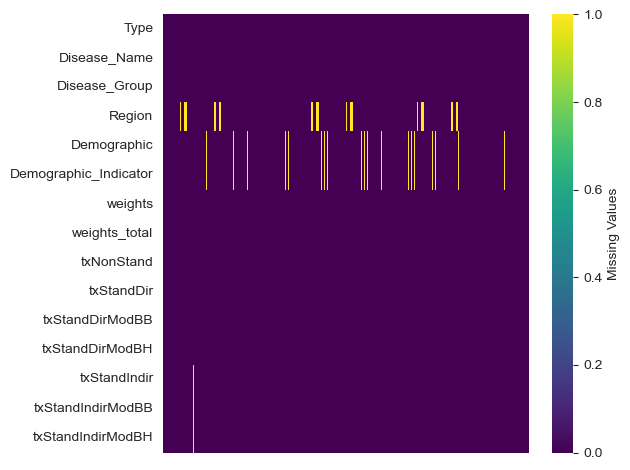



METHOD 2




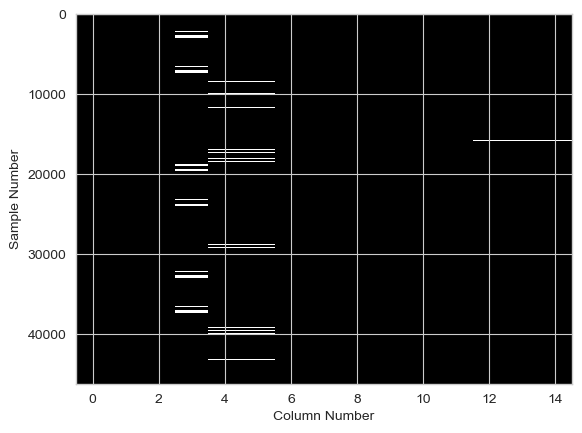

In [2032]:
profiler.visualizeNull(data)

In [2033]:
profiler.nullData(data)

DISPLAYS ROWS WHERE MISSING VALUES ARE FOUND :


,Type,Disease_Name,Disease_Group,Region,Demographic,Demographic_Indicator,weights,weights_total,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
361,prevalence,Cancers,Cancers,84,NaN,NaN,752127.31,15865176.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
362,prevalence,Maladies cardioneurovasculaires,Maladies cardioneurovasculaires,84,NaN,NaN,1127899.23,15865176.05,0.07,0.07,0.07,0.07,0.07,0.07,0.07
363,prevalence,Traitements psychotropes,Traitements psychotropes,84,NaN,NaN,1183790.80,15865176.05,0.07,0.07,0.07,0.08,0.07,0.07,0.08
364,prevalence,Accident vasculaire cérébral aigu,Maladies cardioneurovasculaires,84,NaN,NaN,25860.70,15865176.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00
365,prevalence,Embolie pulmonaire aiguë,Maladies cardioneurovasculaires,84,NaN,NaN,10994.45,15865176.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45329,prevalence,Mucoviscidose,Maladies inflammatoires ou rares ou VIH ou SIDA,94,FISC_NIVVIEM_E2015_S_moy_10,9,0.00,62498.27,0.00,0.00,0.00,0.00,NaN,NaN,NaN
45345,prevalence,Mucoviscidose,Maladies inflammatoires ou rares ou VIH ou SIDA,94,FISC_NIVVIEM_E2015_S_moy_10,10,0.00,56257.07,0.00,0.00,0.00,0.00,NaN,NaN,NaN
45399,prevalence,Mucoviscidose,Maladies inflammatoires ou rares ou VIH ou SIDA,94,classeAge10,<30,0.00,177894.29,0.00,0.00,0.00,0.00,NaN,NaN,NaN
45447,prevalence,Mucoviscidose,Maladies inflammatoires ou rares ou VIH ou SIDA,94,classeAge10,50-59,0.00,99451.71,0.00,0.00,0.00,0.00,NaN,NaN,NaN


In [2034]:
profiler.descriptiveData(data)

QUICK DESCRIPTIVE ANALYSIS :
-------------------------------------------------------------------------------------------------------------


,weights,weights_total,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
count,46172.00,46172.00,46172.00,46172.00,46172.00,46172.00,45794.00,45794.00,45794.00
mean,40846.64,3306688.69,0.02,0.01,0.01,0.02,0.01,0.01,0.02
std,178897.13,5607415.00,0.04,0.04,0.04,0.04,0.04,0.04,0.04
min,0.00,436.60,0.00,0.00,-0.05,0.00,0.00,-0.06,0.00
25%,351.36,364000.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2614.70,975314.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,16368.98,3640874.59,0.01,0.01,0.01,0.01,0.01,0.01,0.01
max,6070513.92,47731712.21,0.59,0.59,0.58,0.68,0.59,0.58,0.71


In [2035]:
profiler.nonNumericStats(data)

NON-NUMERICAL STATISTICS :
-------------------------------------------------------------------------------------------------------------


,Type,Disease_Name,Disease_Group,Region,Demographic,Demographic_Indicator
count,46176,46176,46176,43160,44408,44408
unique,2,52,11,19,5,20
top,prevalence,Artériopathie oblitérante du membre inférieur,Maladies cardioneurovasculaires,F,FISC_NIVVIEM_E2015_S_moy_10,1
freq,23088,888,10656,3016,20800,2704


In [2036]:
profiler.uniqueColumn(data)

UNIQUE VALUES FOR EACH COLUMN :
-------------------------------------------------------------------------------------------------------------
UNIQUE VALUES for column 'Type' : 2 including NaN values, 2 excluding Nan values

['prevalence' 'incidence']

-------------------------------------------------------------------------------------------------------------
UNIQUE VALUES for column 'Disease_Name' : 52 including NaN values, 52 excluding Nan values

['Artériopathie oblitérante du membre inférieur'
 'Maladie coronaire chronique' 'Maladie valvulaire'
 'Maladies métaboliques héréditaires ou amylose'
 'Autres affections neurologiques' "Démences (dont maladie d'Alzheimer)"
 'Maladie de Parkinson' 'Paraplégie'
 "Traitements antidépresseurs ou régulateurs de l'humeur"
 'Traitements hypnotiques' 'Déficience mentale' 'Dialyse chronique'
 'Suivi de transplantation rénale' 'Cancers'
 'Maladies cardioneurovasculaires' 'Traitements du risque vasculaire'
 'Maladies inflammatoires ou rares ou VIH ou 

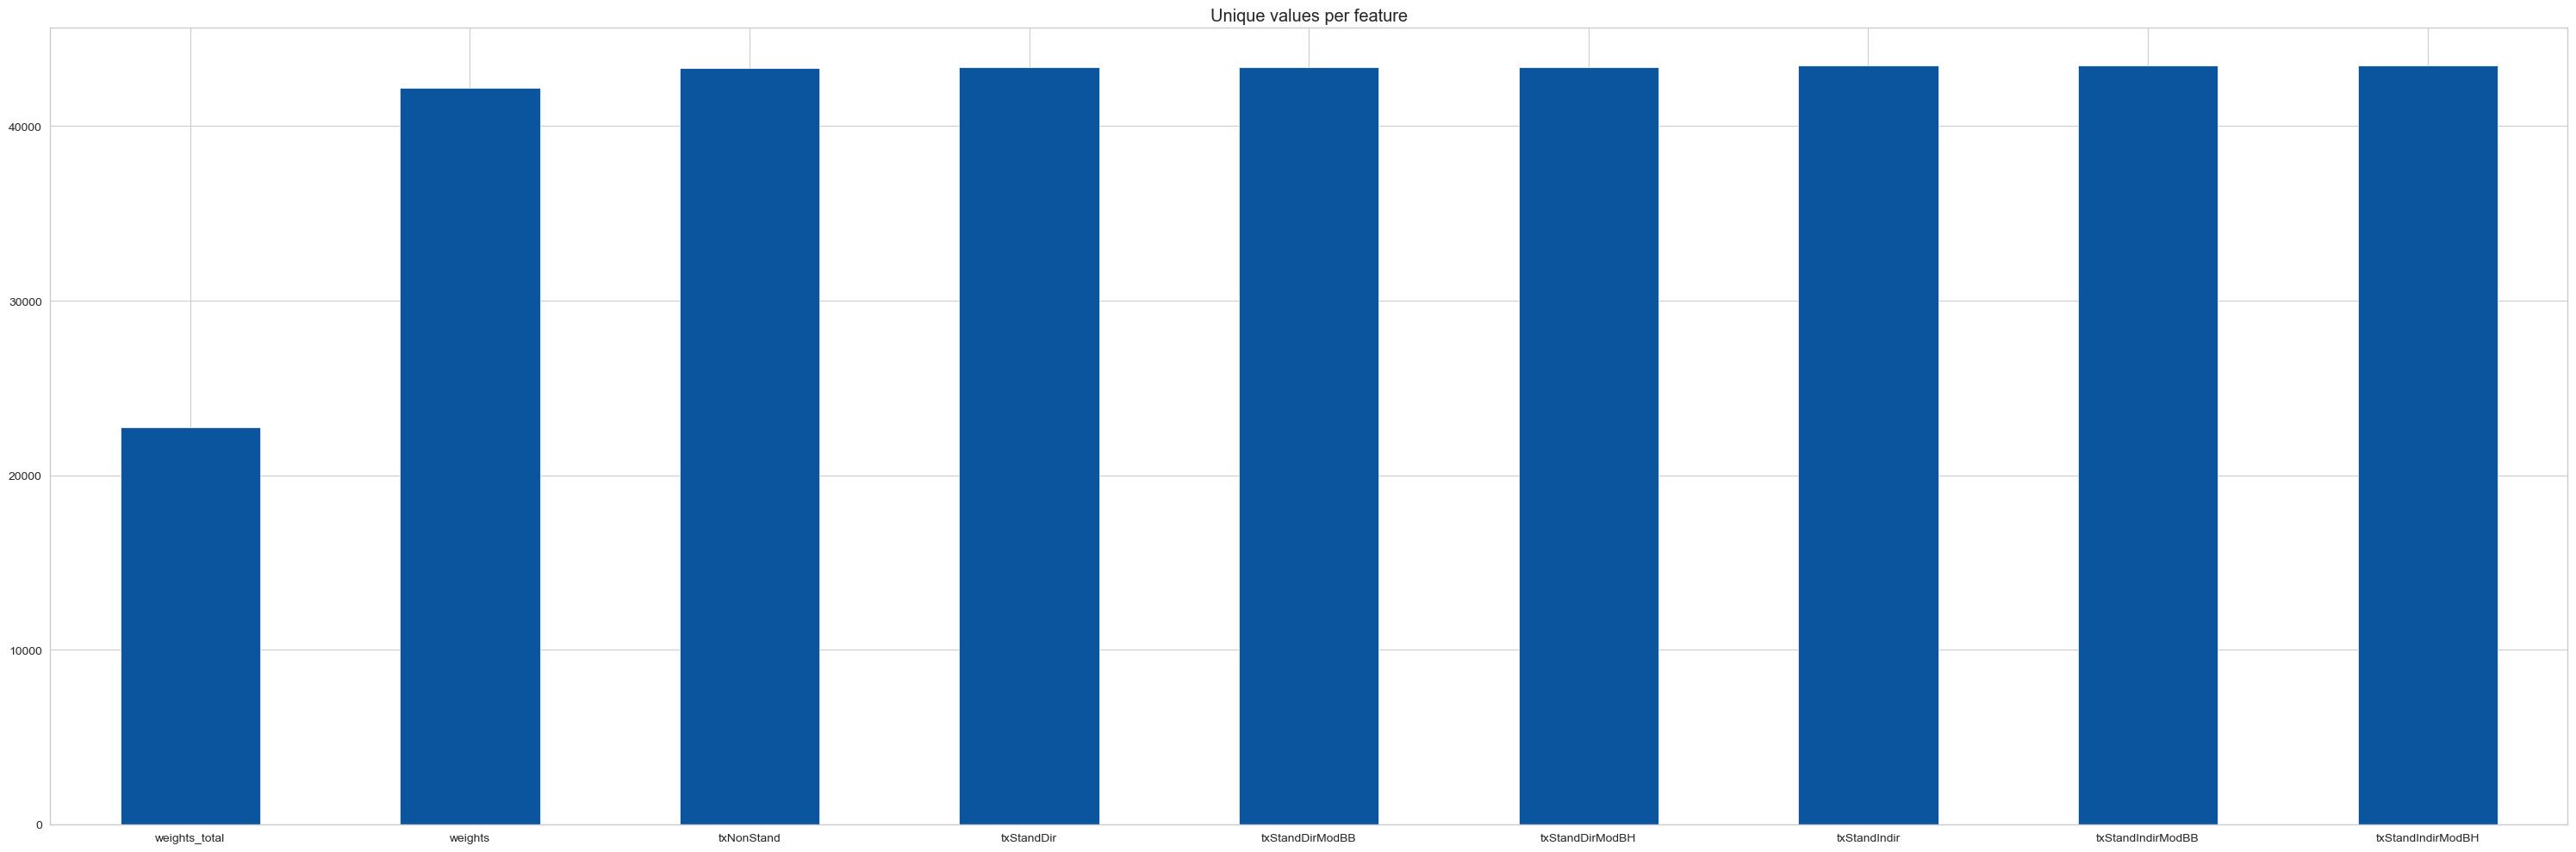

In [2037]:
# for each numerical feature compute number of unique entries

unique_values = data.select_dtypes(include="number").nunique().sort_values()

unique_values.plot.bar(logy=False, title="Unique values per feature", figsize=(30,10))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [2038]:
df2 = data.drop(['Region'], axis=1)
df2

,Type,Disease_Name,Disease_Group,Demographic,Demographic_Indicator,weights,weights_total,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
0,prevalence,Artériopathie oblitérante du membre inférieur,Maladies cardioneurovasculaires,FISC_NIVVIEM_E2015_S_moy_10,1,13621.00,1374418.26,0.01,0.01,0.01,0.02,0.01,0.01,0.02
1,prevalence,Maladie coronaire chronique,Maladies cardioneurovasculaires,FISC_NIVVIEM_E2015_S_moy_10,1,30886.50,1374418.26,0.02,0.03,0.03,0.03,0.03,0.03,0.03
2,prevalence,Maladie valvulaire,Maladies cardioneurovasculaires,FISC_NIVVIEM_E2015_S_moy_10,1,6482.67,1374418.26,0.00,0.01,0.01,0.01,0.01,0.01,0.01
3,prevalence,Maladies métaboliques héréditaires ou amylose,Maladies inflammatoires ou rares ou VIH ou SIDA,FISC_NIVVIEM_E2015_S_moy_10,1,2080.35,1374418.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,prevalence,Autres affections neurologiques,Maladies neurologiques ou dégénératives,FISC_NIVVIEM_E2015_S_moy_10,1,4457.53,1374418.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46171,prevalence,Myopathie ou myasthénie,Maladies neurologiques ou dégénératives,classeAge10,>=90,386.87,396688.72,0.00,0.00,0.00,0.00,0.00,0.00,0.00
46172,prevalence,Traitements neuroleptiques,Traitements psychotropes,classeAge10,>=90,11034.31,396688.72,0.03,0.03,0.03,0.03,0.03,0.03,0.03
46173,prevalence,Troubles névrotiques et de l’humeur,Maladies psychiatriques,classeAge10,>=90,29337.25,396688.72,0.07,0.07,0.07,0.08,0.07,0.07,0.08
46174,prevalence,Dialyse chronique,Insuffisance rénale chronique terminale,classeAge10,>=90,1783.66,396688.72,0.00,0.00,0.00,0.01,0.00,0.00,0.01


In [2039]:
df2.isna().sum()

Type                     0   
Disease_Name             0   
Disease_Group            0   
Demographic              1768
Demographic_Indicator    1768
weights                  4   
weights_total            4   
txNonStand               4   
txStandDir               4   
txStandDirModBB          4   
txStandDirModBH          4   
txStandIndir             382 
txStandIndirModBB        382 
txStandIndirModBH        382 
dtype: int64

In [2040]:
df3 = df2.dropna()
df3

,Type,Disease_Name,Disease_Group,Demographic,Demographic_Indicator,weights,weights_total,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
0,prevalence,Artériopathie oblitérante du membre inférieur,Maladies cardioneurovasculaires,FISC_NIVVIEM_E2015_S_moy_10,1,13621.00,1374418.26,0.01,0.01,0.01,0.02,0.01,0.01,0.02
1,prevalence,Maladie coronaire chronique,Maladies cardioneurovasculaires,FISC_NIVVIEM_E2015_S_moy_10,1,30886.50,1374418.26,0.02,0.03,0.03,0.03,0.03,0.03,0.03
2,prevalence,Maladie valvulaire,Maladies cardioneurovasculaires,FISC_NIVVIEM_E2015_S_moy_10,1,6482.67,1374418.26,0.00,0.01,0.01,0.01,0.01,0.01,0.01
3,prevalence,Maladies métaboliques héréditaires ou amylose,Maladies inflammatoires ou rares ou VIH ou SIDA,FISC_NIVVIEM_E2015_S_moy_10,1,2080.35,1374418.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,prevalence,Autres affections neurologiques,Maladies neurologiques ou dégénératives,FISC_NIVVIEM_E2015_S_moy_10,1,4457.53,1374418.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46171,prevalence,Myopathie ou myasthénie,Maladies neurologiques ou dégénératives,classeAge10,>=90,386.87,396688.72,0.00,0.00,0.00,0.00,0.00,0.00,0.00
46172,prevalence,Traitements neuroleptiques,Traitements psychotropes,classeAge10,>=90,11034.31,396688.72,0.03,0.03,0.03,0.03,0.03,0.03,0.03
46173,prevalence,Troubles névrotiques et de l’humeur,Maladies psychiatriques,classeAge10,>=90,29337.25,396688.72,0.07,0.07,0.07,0.08,0.07,0.07,0.08
46174,prevalence,Dialyse chronique,Insuffisance rénale chronique terminale,classeAge10,>=90,1783.66,396688.72,0.00,0.00,0.00,0.01,0.00,0.00,0.01


In [2041]:
df3.isna().sum()

Type                     0
Disease_Name             0
Disease_Group            0
Demographic              0
Demographic_Indicator    0
weights                  0
weights_total            0
txNonStand               0
txStandDir               0
txStandDirModBB          0
txStandDirModBH          0
txStandIndir             0
txStandIndirModBB        0
txStandIndirModBH        0
dtype: int64

In [2042]:
df3.duplicated().sum()

0

In [2043]:
df3['Type'].value_counts()

prevalence    22124
incidence     21920
Name: Type, dtype: int64

In [2044]:
df3.dtypes

Type                     object 
Disease_Name             object 
Disease_Group            object 
Demographic              object 
Demographic_Indicator    object 
weights                  float64
weights_total            float64
txNonStand               float64
txStandDir               float64
txStandDirModBB          float64
txStandDirModBH          float64
txStandIndir             float64
txStandIndirModBB        float64
txStandIndirModBH        float64
dtype: object

In [2045]:
df3['Disease_Group'] = df3['Disease_Group'].replace(['Diabète','Insuffisance rénale chronique terminale', 'Traitements psychotropes', 
                                                           'Maladies psychiatriques','Maladies neurologiques ou dégénératives',
                                                            'Traitements du risque vasculaire', 'Maladies cardioneurovasculaires',
                                                           'Maladies inflammatoires ou rares ou VIH ou SIDA','Maladies respiratoires chroniques','Maladies du foie ou du pancréas'],
                                                           ['Diabetes','End-stage chronic renal failure','Psychotropic treatments',
                                                           'Psychiatric illnesses','Neurological or degenerative diseases','Vascular risk treatments',
                                                           'Cardio-neurovascular diseases','Inflammatory or rare diseases or HIV or AIDS','Chronic respiratory diseases','Liver or pancreatic diseases'])
df3

/var/folders/vf/1n65j1vx36v93w2m9fv4pfyh0000gn/T/ipykernel_325/3247347798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Disease_Group'] = df3['Disease_Group'].replace(['Diabète','Insuffisance rénale chronique terminale', 'Traitements psychotropes',


,Type,Disease_Name,Disease_Group,Demographic,Demographic_Indicator,weights,weights_total,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
0,prevalence,Artériopathie oblitérante du membre inférieur,Cardio-neurovascular diseases,FISC_NIVVIEM_E2015_S_moy_10,1,13621.00,1374418.26,0.01,0.01,0.01,0.02,0.01,0.01,0.02
1,prevalence,Maladie coronaire chronique,Cardio-neurovascular diseases,FISC_NIVVIEM_E2015_S_moy_10,1,30886.50,1374418.26,0.02,0.03,0.03,0.03,0.03,0.03,0.03
2,prevalence,Maladie valvulaire,Cardio-neurovascular diseases,FISC_NIVVIEM_E2015_S_moy_10,1,6482.67,1374418.26,0.00,0.01,0.01,0.01,0.01,0.01,0.01
3,prevalence,Maladies métaboliques héréditaires ou amylose,Inflammatory or rare diseases or HIV or AIDS,FISC_NIVVIEM_E2015_S_moy_10,1,2080.35,1374418.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,prevalence,Autres affections neurologiques,Neurological or degenerative diseases,FISC_NIVVIEM_E2015_S_moy_10,1,4457.53,1374418.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46171,prevalence,Myopathie ou myasthénie,Neurological or degenerative diseases,classeAge10,>=90,386.87,396688.72,0.00,0.00,0.00,0.00,0.00,0.00,0.00
46172,prevalence,Traitements neuroleptiques,Psychotropic treatments,classeAge10,>=90,11034.31,396688.72,0.03,0.03,0.03,0.03,0.03,0.03,0.03
46173,prevalence,Troubles névrotiques et de l’humeur,Psychiatric illnesses,classeAge10,>=90,29337.25,396688.72,0.07,0.07,0.07,0.08,0.07,0.07,0.08
46174,prevalence,Dialyse chronique,End-stage chronic renal failure,classeAge10,>=90,1783.66,396688.72,0.00,0.00,0.00,0.01,0.00,0.00,0.01


In [2046]:
# Rename values in the Demographic column.
value_mapping = {
    'FISC_NIVVIEM_E2015_S_moy_10': 'Social Class',
    'SEXE': 'Gender',
    'EAR_DIPLR_S': 'Education',
    'EAR_GS_S': 'Professional',
    'classeAge10' : 'Age Group'
}

df3['Demographic'] = df3['Demographic'].replace(value_mapping)
df3['Demographic'].unique()

/var/folders/vf/1n65j1vx36v93w2m9fv4pfyh0000gn/T/ipykernel_325/596314287.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Demographic'] = df3['Demographic'].replace(value_mapping)


array(['Social Class', 'Gender', 'Age Group', 'Education', 'Professional'],
      dtype=object)

In [2047]:
df3.corr()

/var/folders/vf/1n65j1vx36v93w2m9fv4pfyh0000gn/T/ipykernel_325/3136175663.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.corr()


,weights,weights_total,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
weights,1.00,0.33,0.39,0.37,0.39,0.35,0.37,0.39,0.35
weights_total,0.33,1.00,-0.04,-0.04,-0.03,-0.05,-0.04,-0.03,-0.05
txNonStand,0.39,-0.04,1.00,0.99,0.98,0.99,0.99,0.99,0.99
txStandDir,0.37,-0.04,0.99,1.00,0.99,1.00,1.00,0.99,0.99
txStandDirModBB,0.39,-0.03,0.98,0.99,1.00,0.98,0.99,1.00,0.98
txStandDirModBH,0.35,-0.05,0.99,1.00,0.98,1.00,0.99,0.98,1.00
txStandIndir,0.37,-0.04,0.99,1.00,0.99,0.99,1.00,0.99,1.00
txStandIndirModBB,0.39,-0.03,0.99,0.99,1.00,0.98,0.99,1.00,0.98
txStandIndirModBH,0.35,-0.05,0.99,0.99,0.98,1.00,1.00,0.98,1.00


/var/folders/vf/1n65j1vx36v93w2m9fv4pfyh0000gn/T/ipykernel_325/3273369634.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df3.corr(), dtype=np.bool)
/var/folders/vf/1n65j1vx36v93w2m9fv4pfyh0000gn/T/ipykernel_325/3273369634.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df3.corr(), dtype=np.bool)
/var/folders/vf/1n65j1vx36v93w2m9fv4pfyh0000gn/T/ipykernel_325/3273369634.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is dep

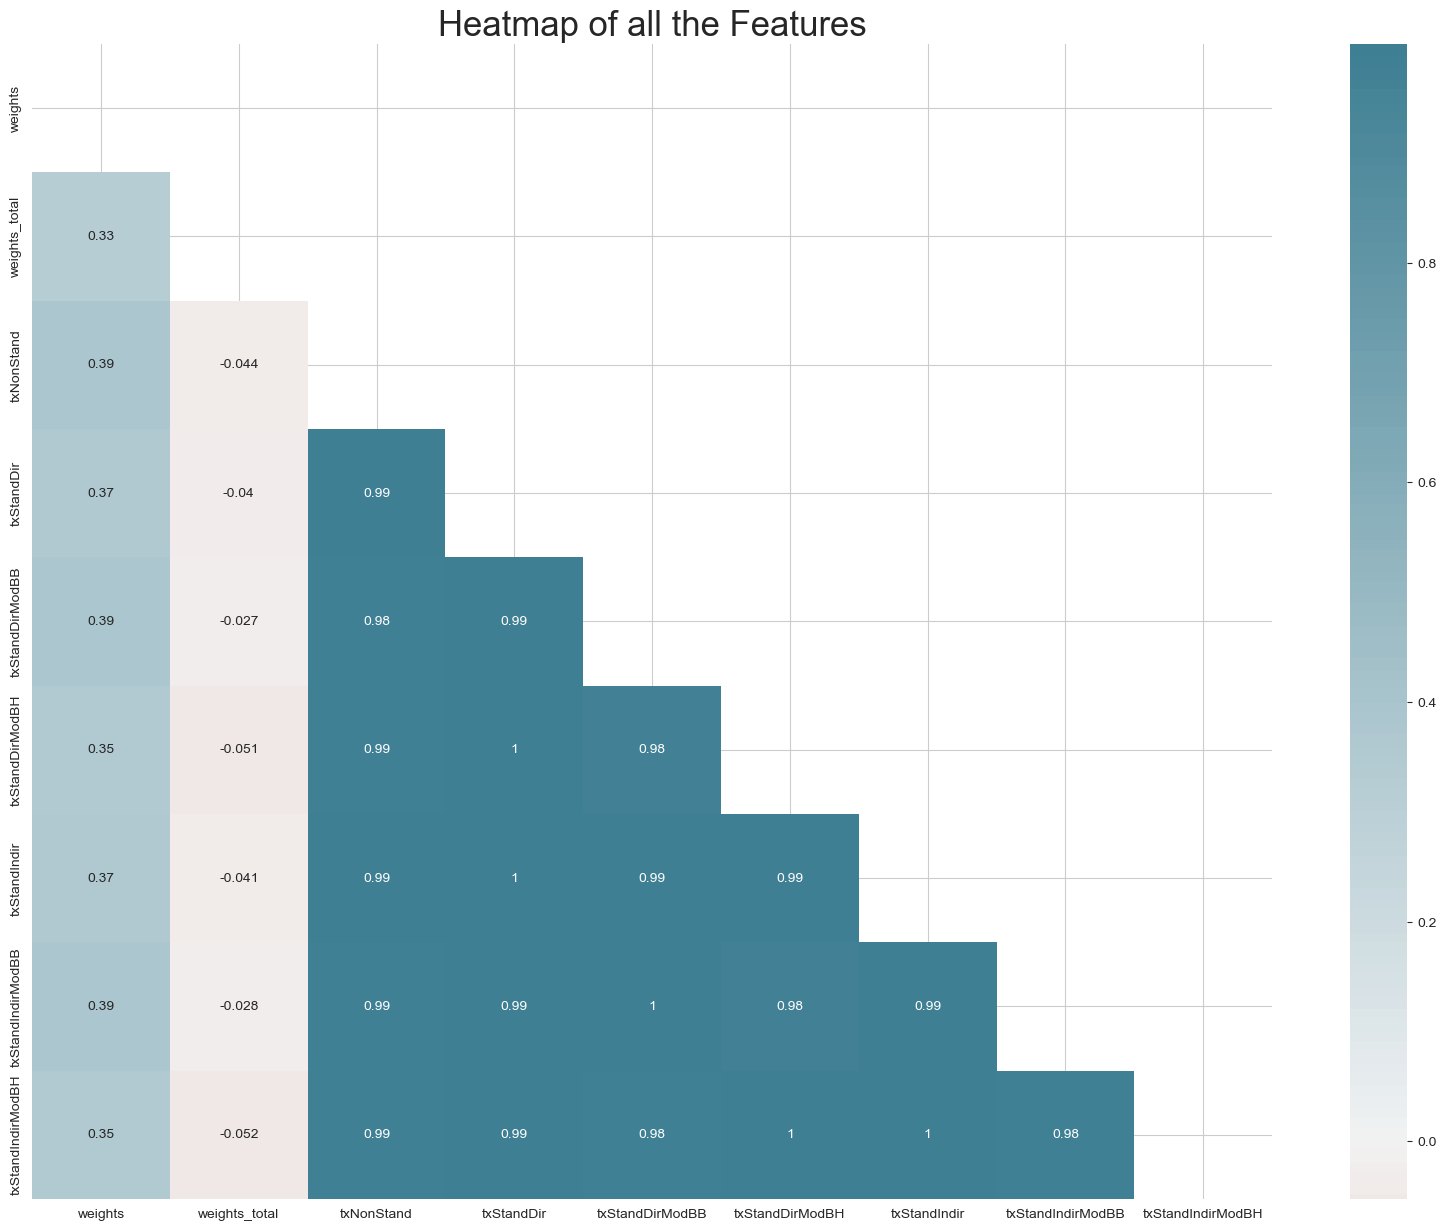

In [2048]:
# EDA

import matplotlib.style as style
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (20,15))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df3.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df3.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );

plt.title("Heatmap of all the Features", fontsize = 25);

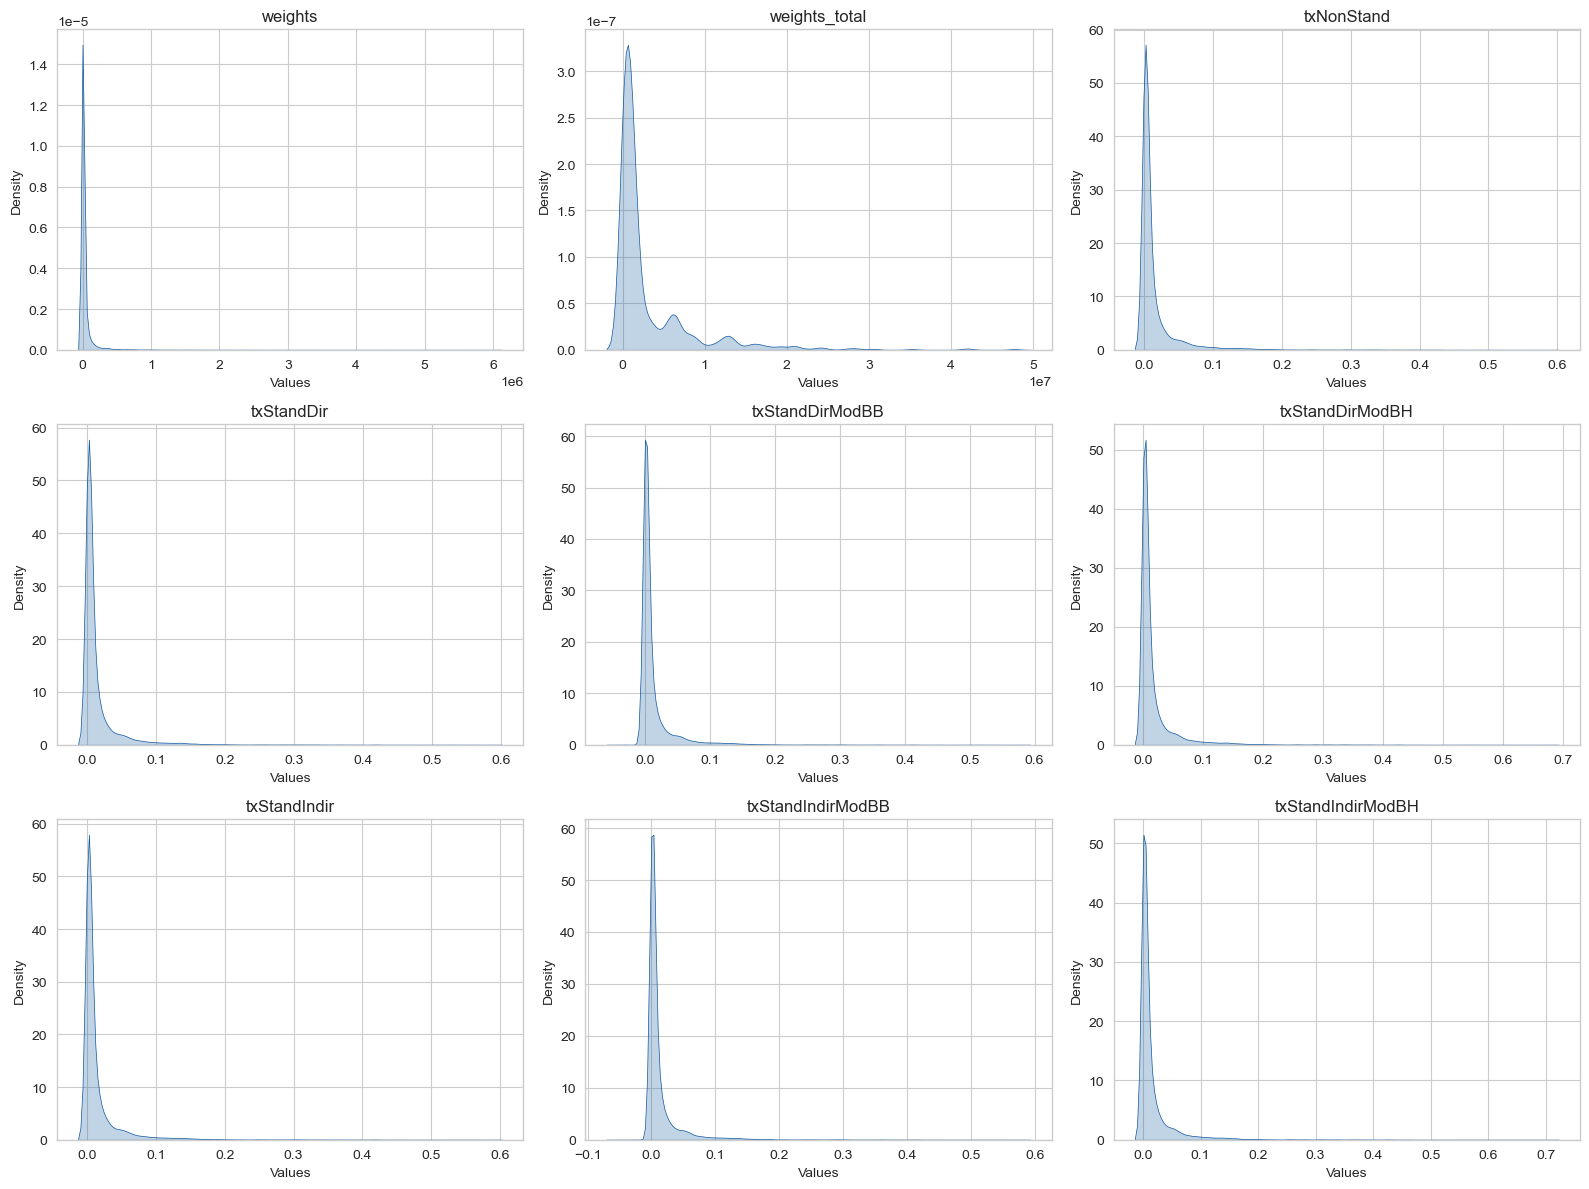

In [2049]:
sns.set_palette('Blues_r')

# Get the numerical columns from the DataFrame
num_cols = df3.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of subplots needed
num_plots = len(num_cols)

# Calculate the number of columns per row
num_cols_per_row = 3

# Calculate the number of rows
num_rows = (num_plots - 1) // num_cols_per_row + 1

# Create the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(16, 4 * num_rows))

# Flatten the axes array to facilitate iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, col in enumerate(num_cols):
    sns.kdeplot(data=df3[col], ax=axes[i], fill=True)
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Density')

# Hide unused subplots
for j in range(num_plots, num_rows * num_cols_per_row):
    axes[j].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

plt.show()

In [2050]:
# Calculate the IQR of the column we want to find the outliers
Q1 = num.quantile(0.25)
Q3 = num.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers as 1.5 times the IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = num[(num < lower_bound) | (num > upper_bound)]

# Print the number of outliers
print(f"The total number of outliers is: {outliers.count().sum()}\n\nNumber of outliers in each columns:\n{outliers.count()}") 

The total number of outliers is: 53078

Number of outliers in each columns:
weights              6724
weights_total        5455
txNonStand           5843
txStandDir           5798
txStandDirModBB      6060
txStandDirModBH      5678
txStandIndir         5785
txStandIndirModBB    6072
txStandIndirModBH    5663
dtype: int64


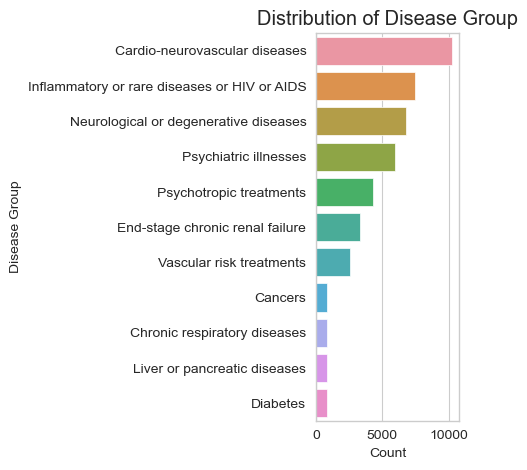

In [2051]:
# Distribution of Diesase Group
plt.subplot(1, 2, 2)
sns.countplot(data=df3, y='Disease_Group', order=df3['Disease_Group'].value_counts().index)  
plt.xlabel('Count')  
plt.ylabel('Disease Group')
plt.title('Distribution of Disease Group')

plt.tight_layout()
plt.show()

In [2052]:
count_disease = pd.pivot_table(df3, values='Disease_Name', index='Disease_Group', aggfunc='count').sort_values(by='Disease_Name', ascending=False)
count_disease

,Disease_Name
Disease_Group,
Cardio-neurovascular diseases,10246
Inflammatory or rare diseases or HIV or AIDS,7466
Neurological or degenerative diseases,6772
Psychiatric illnesses,5978
Psychotropic treatments,4270
End-stage chronic renal failure,3336
Vascular risk treatments,2562
Cancers,854
Chronic respiratory diseases,854


In [2053]:
c_car = df3.loc[df3['Disease_Group']=='Cardio-neurovascular diseases'] 
c_car['Disease_Name'].value_counts()

Artériopathie oblitérante du membre inférieur       854
Maladie coronaire chronique                         854
Maladie valvulaire                                  854
Accident vasculaire cérébral aigu                   854
Autres affections cardiovasculaires                 854
Embolie pulmonaire aiguë                            854
Insuffisance cardiaque chronique                    854
Syndrome coronaire aigu                             854
Troubles du rythme ou de la conduction cardiaque    854
Séquelle d'accident vasculaire cérébral             854
Insuffisance cardiaque aiguë                        854
Maladies cardioneurovasculaires                     852
Name: Disease_Name, dtype: int64

In [2054]:
c_dia = df3.loc[df3['Disease_Group']=='Diabetes'] 
c_dia['Disease_Name'].value_counts()

Diabète    852
Name: Disease_Name, dtype: int64

In [2055]:
c_psy_tr = df3.loc[df3['Disease_Group']== 'Psychotropic treatments']
c_psy_tr['Disease_Name'].value_counts()

Traitements antidépresseurs ou régulateurs de l'humeur    854
Traitements hypnotiques                                   854
Traitements anxiolytiques                                 854
Traitements neuroleptiques                                854
Traitements psychotropes                                  854
Name: Disease_Name, dtype: int64

In [2056]:
c_hiv = df3.loc[df3['Disease_Group']== 'Inflammatory or rare diseases or HIV or AIDS']
c_hiv['Disease_Name'].value_counts()

Maladies métaboliques héréditaires ou amylose          854
Maladies inflammatoires ou rares ou VIH ou SIDA        854
Maladies inflammatoires chroniques intestinales        854
Polyarthrite rhumatoïde et maladies apparentées        854
Spondylarthrite ankylosante et maladies apparentées    854
VIH ou SIDA                                            854
Autres maladies inflammatoires chroniques              854
Hémophilie ou troubles de l'hémostase graves           834
Mucoviscidose                                          654
Name: Disease_Name, dtype: int64

In [2057]:
c_can = df3.loc[df3['Disease_Group']== 'Cancers']
c_can['Disease_Name'].value_counts()

Cancers    854
Name: Disease_Name, dtype: int64

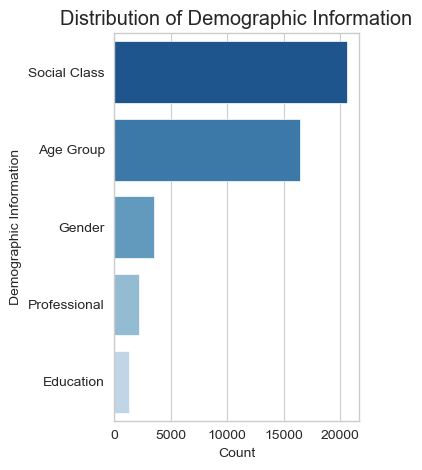

In [2058]:
# Distribution for each type of Demographic Information

plt.subplot(1, 2, 2)
sns.countplot(data=df3, y='Demographic', order=df3['Demographic'].value_counts().index)  
plt.xlabel('Count')  
plt.ylabel('Demographic Information')
plt.title('Distribution of Demographic Information')

plt.tight_layout()
plt.show()

In [2059]:
social_class = df3.loc[data['Demographic']=='FISC_NIVVIEM_E2015_S_moy_10'] 
social_class

,Type,Disease_Name,Disease_Group,Demographic,Demographic_Indicator,weights,weights_total,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
0,prevalence,Artériopathie oblitérante du membre inférieur,Cardio-neurovascular diseases,Social Class,1,13621.00,1374418.26,0.01,0.01,0.01,0.02,0.01,0.01,0.02
1,prevalence,Maladie coronaire chronique,Cardio-neurovascular diseases,Social Class,1,30886.50,1374418.26,0.02,0.03,0.03,0.03,0.03,0.03,0.03
2,prevalence,Maladie valvulaire,Cardio-neurovascular diseases,Social Class,1,6482.67,1374418.26,0.00,0.01,0.01,0.01,0.01,0.01,0.01
3,prevalence,Maladies métaboliques héréditaires ou amylose,Inflammatory or rare diseases or HIV or AIDS,Social Class,1,2080.35,1374418.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,prevalence,Autres affections neurologiques,Neurological or degenerative diseases,Social Class,1,4457.53,1374418.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46043,prevalence,Déficience mentale,Psychiatric illnesses,Social Class,10,3334.98,6536008.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00
46044,prevalence,Troubles névrotiques et de l’humeur,Psychiatric illnesses,Social Class,10,90839.29,6536008.55,0.01,0.01,0.01,0.01,0.01,0.01,0.01
46045,prevalence,Dialyse chronique,End-stage chronic renal failure,Social Class,10,5017.77,6536008.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00
46046,prevalence,Suivi de transplantation rénale,End-stage chronic renal failure,Social Class,10,3758.22,6536008.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [2060]:
social_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20620 entries, 0 to 46047
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Type                   20620 non-null  object 
 1   Disease_Name           20620 non-null  object 
 2   Disease_Group          20620 non-null  object 
 3   Demographic            20620 non-null  object 
 4   Demographic_Indicator  20620 non-null  object 
 5   weights                20620 non-null  float64
 6   weights_total          20620 non-null  float64
 7   txNonStand             20620 non-null  float64
 8   txStandDir             20620 non-null  float64
 9   txStandDirModBB        20620 non-null  float64
 10  txStandDirModBH        20620 non-null  float64
 11  txStandIndir           20620 non-null  float64
 12  txStandIndirModBB      20620 non-null  float64
 13  txStandIndirModBH      20620 non-null  float64
dtypes: float64(9), object(5)
memory usage: 2.4+ MB


In [2061]:
social_class['Demographic_Indicator'] = social_class['Demographic_Indicator'].astype(int)

/var/folders/vf/1n65j1vx36v93w2m9fv4pfyh0000gn/T/ipykernel_325/987525740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  social_class['Demographic_Indicator'] = social_class['Demographic_Indicator'].astype(int)


In [2062]:
social_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20620 entries, 0 to 46047
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Type                   20620 non-null  object 
 1   Disease_Name           20620 non-null  object 
 2   Disease_Group          20620 non-null  object 
 3   Demographic            20620 non-null  object 
 4   Demographic_Indicator  20620 non-null  int64  
 5   weights                20620 non-null  float64
 6   weights_total          20620 non-null  float64
 7   txNonStand             20620 non-null  float64
 8   txStandDir             20620 non-null  float64
 9   txStandDirModBB        20620 non-null  float64
 10  txStandDirModBH        20620 non-null  float64
 11  txStandIndir           20620 non-null  float64
 12  txStandIndirModBB      20620 non-null  float64
 13  txStandIndirModBH      20620 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 2.4+ 

In [2063]:
sc_pivot = social_class[['Disease_Group','Demographic_Indicator', "weights","Type"]].pivot_table(index=['Type','Disease_Group'], columns= "Demographic_Indicator", values='weights', aggfunc=sum).replace(np.nan,0)

In [2064]:
def color_rank_one(val):
    '''This function applies the orange background color to the first rank'''
    if val == 1:
        return 'background-color: mediumturquoise'
    else:
        return ''
sc_pivot.style.format('{:,.0f}').background_gradient(cmap='Blues_r', axis=0).applymap(color_rank_one)

In [2065]:
# relationship between social class and ratio of incidence patients / prevalence patients
ra_in = social_class.loc[social_class['Type']=='incidence']
ra_in

,Type,Disease_Name,Disease_Group,Demographic,Demographic_Indicator,weights,weights_total,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
2663,incidence,Traitements psychotropes,Psychotropic treatments,Social Class,1,218766.55,11571954.18,0.02,0.02,0.02,0.02,0.02,0.02,0.02
2664,incidence,Maladies psychiatriques,Psychiatric illnesses,Social Class,1,109733.44,11704431.18,0.01,0.01,0.01,0.01,0.01,0.01,0.01
2665,incidence,Maladies du foie ou du pancréas,Liver or pancreatic diseases,Social Class,1,40325.18,12264670.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2666,incidence,Artériopathie oblitérante du membre inférieur,Cardio-neurovascular diseases,Social Class,1,23115.11,12292782.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2667,incidence,Insuffisance cardiaque chronique,Cardio-neurovascular diseases,Social Class,1,41658.72,12308355.62,0.00,0.01,0.01,0.01,0.01,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36283,incidence,Troubles névrotiques et de l’humeur,Psychiatric illnesses,Social Class,10,22873.03,6247138.51,0.00,0.00,0.00,0.00,0.00,0.00,0.00
36284,incidence,Troubles psychiatriques ayant débuté dans l'enfance,Psychiatric illnesses,Social Class,10,1810.95,6317379.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00
36285,incidence,Troubles psychotiques,Psychiatric illnesses,Social Class,10,1360.63,6314848.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00
36286,incidence,Dialyse chronique,End-stage chronic renal failure,Social Class,10,1226.65,6322353.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [2066]:
sc_psy = ra_in.loc[ra_in['Disease_Group']=='Psychotropic treatments']
sc_psy

,Type,Disease_Name,Disease_Group,Demographic,Demographic_Indicator,weights,weights_total,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
2663,incidence,Traitements psychotropes,Psychotropic treatments,Social Class,1,218766.55,11571954.18,0.02,0.02,0.02,0.02,0.02,0.02,0.02
2675,incidence,Traitements hypnotiques,Psychotropic treatments,Social Class,1,61497.39,12160496.67,0.01,0.01,0.01,0.01,0.01,0.01,0.01
2680,incidence,Traitements psychotropes,Psychotropic treatments,Social Class,2,242739.06,11235129.71,0.02,0.02,0.02,0.02,0.02,0.02,0.02
2697,incidence,Traitements antidépresseurs ou régulateurs de l'humeur,Psychotropic treatments,Social Class,2,126362.29,11838598.78,0.01,0.01,0.01,0.01,0.01,0.01,0.01
2698,incidence,Traitements hypnotiques,Psychotropic treatments,Social Class,2,67534.68,11972302.35,0.01,0.01,0.01,0.01,0.01,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36238,incidence,Traitements antidépresseurs ou régulateurs de l'humeur,Psychotropic treatments,Social Class,8,52063.81,6100546.48,0.01,0.01,0.01,0.01,0.01,0.01,0.01
36257,incidence,Traitements antidépresseurs ou régulateurs de l'humeur,Psychotropic treatments,Social Class,9,57684.08,6086222.62,0.01,0.01,0.01,0.01,0.01,0.01,0.01
36267,incidence,Traitements psychotropes,Psychotropic treatments,Social Class,10,109052.98,5932326.60,0.02,0.02,0.01,0.02,0.02,0.01,0.02
36278,incidence,Traitements antidépresseurs ou régulateurs de l'humeur,Psychotropic treatments,Social Class,10,57884.32,6138722.47,0.01,0.01,0.01,0.01,0.01,0.01,0.01


In [2067]:
in_pi = ra_in[['Disease_Group','Demographic_Indicator', "weights","Type"]].pivot_table(index=['Type','Disease_Group'], columns= "Demographic_Indicator", values='weights', aggfunc=np.mean).rank(ascending=False, axis=0)
def color_rank_one(val):
    '''This function applies the orange background color to the first rank'''
    if val == 1:
        return 'background-color: mediumturquoise'
    else:
        return ''

in_pi.style.format('{:,.0f}').background_gradient(cmap='Blues_r', axis=0).applymap(color_rank_one)

In [2068]:
ra_pre = social_class.loc[social_class['Type']=='prevalence']
ra_pre

,Type,Disease_Name,Disease_Group,Demographic,Demographic_Indicator,weights,weights_total,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
0,prevalence,Artériopathie oblitérante du membre inférieur,Cardio-neurovascular diseases,Social Class,1,13621.00,1374418.26,0.01,0.01,0.01,0.02,0.01,0.01,0.02
1,prevalence,Maladie coronaire chronique,Cardio-neurovascular diseases,Social Class,1,30886.50,1374418.26,0.02,0.03,0.03,0.03,0.03,0.03,0.03
2,prevalence,Maladie valvulaire,Cardio-neurovascular diseases,Social Class,1,6482.67,1374418.26,0.00,0.01,0.01,0.01,0.01,0.01,0.01
3,prevalence,Maladies métaboliques héréditaires ou amylose,Inflammatory or rare diseases or HIV or AIDS,Social Class,1,2080.35,1374418.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,prevalence,Autres affections neurologiques,Neurological or degenerative diseases,Social Class,1,4457.53,1374418.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46043,prevalence,Déficience mentale,Psychiatric illnesses,Social Class,10,3334.98,6536008.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00
46044,prevalence,Troubles névrotiques et de l’humeur,Psychiatric illnesses,Social Class,10,90839.29,6536008.55,0.01,0.01,0.01,0.01,0.01,0.01,0.01
46045,prevalence,Dialyse chronique,End-stage chronic renal failure,Social Class,10,5017.77,6536008.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00
46046,prevalence,Suivi de transplantation rénale,End-stage chronic renal failure,Social Class,10,3758.22,6536008.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [2069]:
pre_pi = ra_pre[['Disease_Group','Demographic_Indicator', "weights","Type"]].pivot_table(index=['Type','Disease_Group'], columns= "Demographic_Indicator", values='weights', aggfunc=sum).rank(ascending=False, axis=0)
def color_rank_one(val):
    '''This function applies the orange background color to the first rank'''
    if val == 1:
        return 'background-color: mediumturquoise'
    else:
        return ''

pre_pi.style.format('{:,.0f}').background_gradient(cmap='Blues_r', axis=0).applymap(color_rank_one)

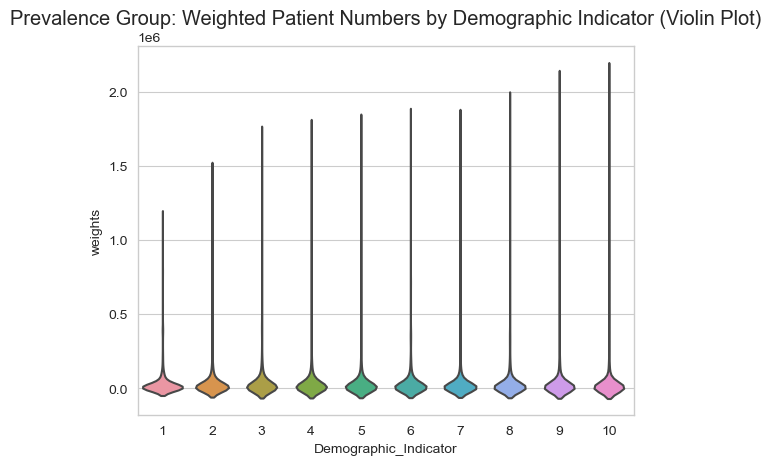

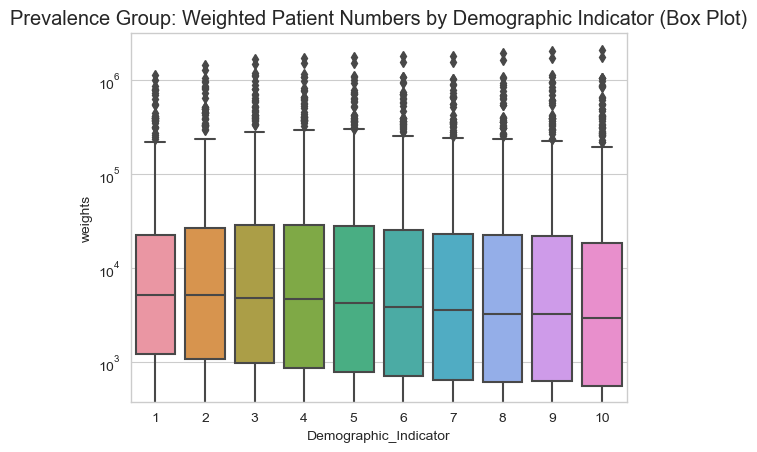

In [2070]:
# prevalence group
# violin plot
sns.violinplot(y='weights', x='Demographic_Indicator', data=ra_pre, inner=None)
plt.title("Prevalence Group: Weighted Patient Numbers by Demographic Indicator (Violin Plot)")
plt.show()

#box plot
sns.boxplot(y='weights', x='Demographic_Indicator', data=ra_pre, whis=10)

#Log scale: to show the relationship more clearly
plt.yscale('log')
plt.title("Prevalence Group: Weighted Patient Numbers by Demographic Indicator (Box Plot)")
plt.show()

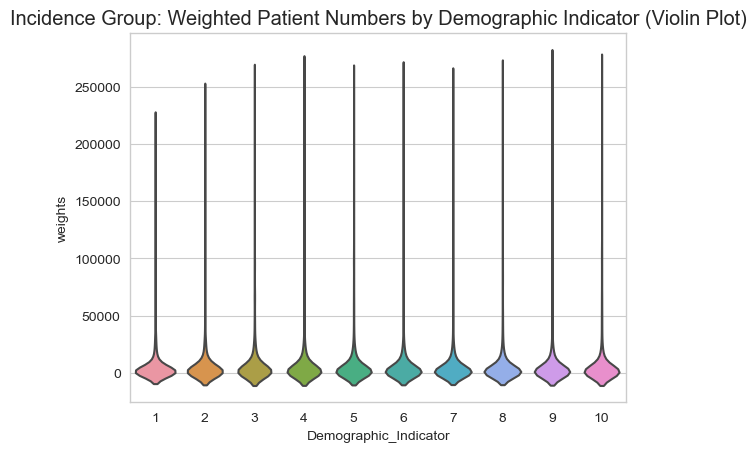

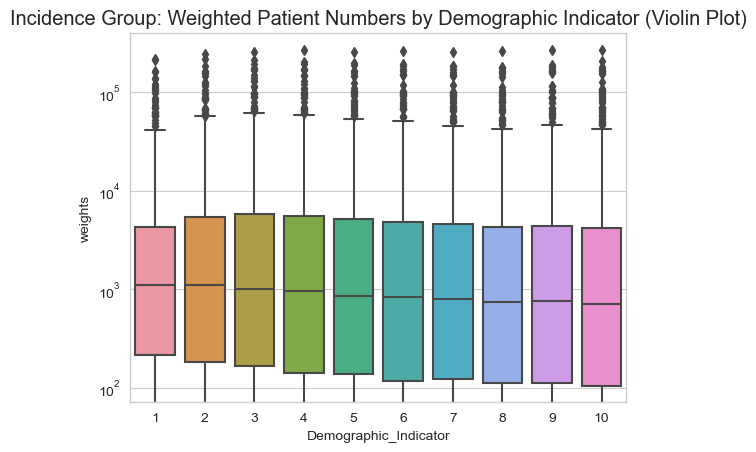

In [2071]:
# incidence group
# violin plot
sns.violinplot(y='weights', x='Demographic_Indicator', data=ra_in, inner=None)
plt.title("Incidence Group: Weighted Patient Numbers by Demographic Indicator (Violin Plot)")
plt.show()

#box plot
sns.boxplot(y='weights', x='Demographic_Indicator', data=ra_in, whis=10)

plt.yscale('log')
plt.title("Incidence Group: Weighted Patient Numbers by Demographic Indicator (Violin Plot)")
plt.show()

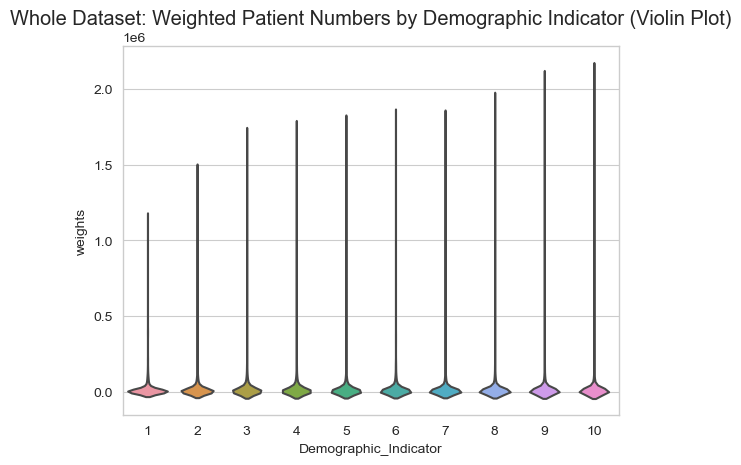

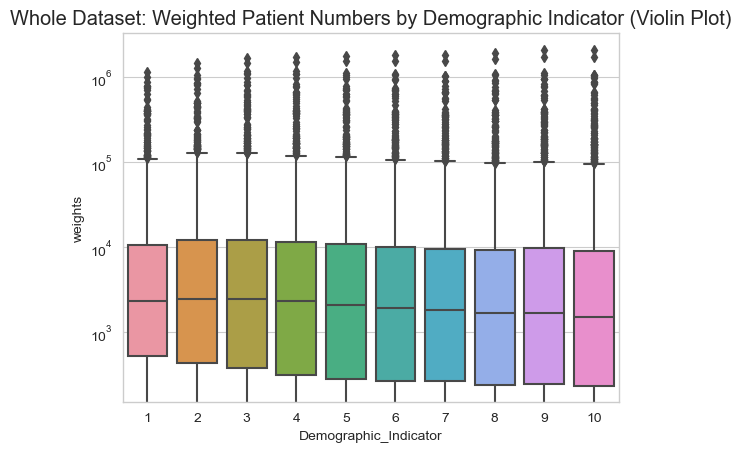

In [2072]:
# whole dataset
# violin plot
sns.violinplot(y='weights', x='Demographic_Indicator', data=social_class, inner=None)
plt.title("Whole Dataset: Weighted Patient Numbers by Demographic Indicator (Violin Plot)")
plt.show()

#box plot
sns.boxplot(y='weights', x='Demographic_Indicator', data=social_class, whis=10)

plt.yscale('log')
plt.title("Whole Dataset: Weighted Patient Numbers by Demographic Indicator (Violin Plot)")
plt.show()

In [2073]:
diplome = df3.loc[data['Demographic']=='EAR_DIPLR_S']
diplome

,Type,Disease_Name,Disease_Group,Demographic,Demographic_Indicator,weights,weights_total,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
2070,incidence,Maladies inflammatoires ou rares ou VIH ou SIDA,Inflammatory or rare diseases or HIV or AIDS,Education,1,56989.19,19699537.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2071,incidence,Diabète,Diabetes,Education,1,155385.15,17470335.99,0.01,0.01,0.01,0.01,0.01,0.01,0.01
2072,incidence,Embolie pulmonaire aiguë,Cardio-neurovascular diseases,Education,1,35224.71,20224148.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2073,incidence,Insuffisance cardiaque aiguë,Cardio-neurovascular diseases,Education,1,165958.27,20103411.89,0.01,0.00,0.00,0.00,0.00,0.00,0.00
2074,incidence,Maladie valvulaire,Cardio-neurovascular diseases,Education,1,127622.46,19899115.05,0.01,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36845,prevalence,Maladie de Parkinson,Neurological or degenerative diseases,Education,4,51382.23,14099276.74,0.00,0.01,0.00,0.01,0.01,0.00,0.01
36846,prevalence,Myopathie ou myasthénie,Neurological or degenerative diseases,Education,4,8987.72,14099276.74,0.00,0.00,0.00,0.00,0.00,0.00,0.00
36847,prevalence,Autres troubles psychiatriques,Psychiatric illnesses,Education,4,52363.37,14099276.74,0.00,0.00,0.00,0.00,0.00,0.00,0.00
36848,prevalence,Troubles névrotiques et de l’humeur,Psychiatric illnesses,Education,4,228120.78,14099276.74,0.02,0.02,0.02,0.02,0.02,0.02,0.02


In [2074]:
diplome.isna().sum()

Type                     0
Disease_Name             0
Disease_Group            0
Demographic              0
Demographic_Indicator    0
weights                  0
weights_total            0
txNonStand               0
txStandDir               0
txStandDirModBB          0
txStandDirModBH          0
txStandIndir             0
txStandIndirModBB        0
txStandIndirModBH        0
dtype: int64

In [2075]:
d_pivot = diplome[['Disease_Group','Demographic_Indicator', "weights","Type"]].pivot_table(index=['Type','Disease_Group'], columns= "Demographic_Indicator", values='weights', aggfunc=sum).replace(np.nan,0)
def color_rank_one(val):
    '''This function applies the orange background color to the first rank'''
    if val == 1:
        return 'background-color: mediumturquoise'
    else:
        return ''
d_pivot.style.format('{:,.0f}').background_gradient(cmap='Blues_r', axis=0).applymap(color_rank_one)

In [2076]:
ra_in_d = diplome.loc[diplome['Type']=='incidence']
in_d_pivot = ra_in_d[['Disease_Group','Demographic_Indicator', "weights","Type"]].pivot_table(index=['Type','Disease_Group'], columns= "Demographic_Indicator", values='weights', aggfunc=sum).rank(ascending=False, axis=0)
def color_rank_one(val):
    '''This function applies the orange background color to the first rank'''
    if val == 1:
        return 'background-color: mediumturquoise'
    else:
        return ''

in_d_pivot.style.format('{:,.0f}').background_gradient(cmap='Blues_r', axis=0).applymap(color_rank_one)

In [2077]:
ra_in_d = diplome.loc[diplome['Type']=='prevalence']
pre_d_pivot = ra_in_d[['Disease_Group','Demographic_Indicator', "weights","Type"]].pivot_table(index=['Type','Disease_Group'], columns= "Demographic_Indicator", values='weights', aggfunc=sum).rank(ascending=False, axis=0)
def color_rank_one(val):
    '''This function applies the orange background color to the first rank'''
    if val == 1:
        return 'background-color: mediumturquoise'
    else:
        return ''

pre_d_pivot.style.format('{:,.0f}').background_gradient(cmap='Blues_r', axis=0).applymap(color_rank_one)

In [2078]:
job = df3.loc[data['Demographic']=='EAR_GS_S']
job

,Type,Disease_Name,Disease_Group,Demographic,Demographic_Indicator,weights,weights_total,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
2131,incidence,Maladies psychiatriques,Psychiatric illnesses,Professional,1,26739.45,2117840.15,0.01,0.00,0.00,0.01,0.01,0.01,0.01
2132,incidence,Maladies respiratoires chroniques,Chronic respiratory diseases,Professional,1,39949.61,2049009.18,0.02,0.01,0.01,0.01,0.01,0.01,0.02
2133,incidence,Accident vasculaire cérébral aigu,Cardio-neurovascular diseases,Professional,1,12988.21,2225973.35,0.01,0.00,0.00,0.00,0.00,0.00,0.00
2134,incidence,Autres affections cardiovasculaires,Cardio-neurovascular diseases,Professional,1,5292.53,2202593.97,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2135,incidence,Insuffisance cardiaque aiguë,Cardio-neurovascular diseases,Professional,1,24510.13,2216492.64,0.01,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36951,prevalence,Hémophilie ou troubles de l'hémostase graves,Inflammatory or rare diseases or HIV or AIDS,Professional,8,9905.34,19373890.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00
36952,prevalence,Autres affections neurologiques,Neurological or degenerative diseases,Professional,8,78832.03,19373890.61,0.00,0.01,0.01,0.02,0.01,0.01,0.01
36953,prevalence,Épilepsie,Neurological or degenerative diseases,Professional,8,125896.29,19373890.61,0.01,0.02,0.01,0.02,0.01,0.01,0.01
36954,prevalence,Traitements neuroleptiques,Psychotropic treatments,Professional,8,70468.89,19373890.61,0.00,0.01,0.01,0.02,0.01,0.01,0.01


In [2079]:
job.isna().sum()

Type                     0
Disease_Name             0
Disease_Group            0
Demographic              0
Demographic_Indicator    0
weights                  0
weights_total            0
txNonStand               0
txStandDir               0
txStandDirModBB          0
txStandDirModBH          0
txStandIndir             0
txStandIndirModBB        0
txStandIndirModBH        0
dtype: int64

In [2080]:
j_pivot = job[['Disease_Group','Demographic_Indicator', "weights","Type"]].pivot_table(index=['Type','Disease_Group'], columns= "Demographic_Indicator", values='weights', aggfunc=sum).replace(np.nan,0)
def color_rank_one(val):
    '''This function applies the orange background color to the first rank'''
    if val == 1:
        return 'background-color: mediumturquoise'
    else:
        return ''
j_pivot.style.format('{:,.0f}').background_gradient(cmap='Blues_r', axis=0).applymap(color_rank_one)

In [2081]:
ra_in_j = job.loc[job['Type']=='incidence']
in_j_pivot = ra_in_j[['Disease_Group','Demographic_Indicator', "weights","Type"]].pivot_table(index=['Type','Disease_Group'], columns= "Demographic_Indicator", values='weights', aggfunc=sum).rank(ascending=False, axis=0)
def color_rank_one(val):
    '''This function applies the orange background color to the first rank'''
    if val == 1:
        return 'background-color: mediumturquoise'
    else:
        return ''

in_j_pivot.style.format('{:,.0f}').background_gradient(cmap='Blues_r', axis=0).applymap(color_rank_one)

In [2082]:
ra_pre_j = job.loc[job['Type']=='prevalence']
pre_j_pivot = ra_pre_j[['Disease_Group','Demographic_Indicator', "weights","Type"]].pivot_table(index=['Type','Disease_Group'], columns= "Demographic_Indicator", values='weights', aggfunc=sum).rank(ascending=False, axis=0)
def color_rank_one(val):
    '''This function applies the orange background color to the first rank'''
    if val == 1:
        return 'background-color: mediumturquoise'
    else:
        return ''

pre_j_pivot.style.format('{:,.0f}').background_gradient(cmap='Blues_r', axis=0).applymap(color_rank_one)

In [2083]:
gender = df3.loc[data['Demographic']=='SEXE']
gender

,Type,Disease_Name,Disease_Group,Demographic,Demographic_Indicator,weights,weights_total,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
181,prevalence,Maladies inflammatoires ou rares ou VIH ou SIDA,Inflammatory or rare diseases or HIV or AIDS,Gender,F,116843.95,6015875.84,0.02,0.02,0.02,0.02,0.02,0.02,0.02
182,prevalence,Insuffisance rénale chronique terminale,End-stage chronic renal failure,Gender,F,6093.20,6015875.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00
183,prevalence,Maladies respiratoires chroniques,Chronic respiratory diseases,Gender,F,322505.62,6015875.84,0.05,0.05,0.05,0.05,0.05,0.05,0.05
184,prevalence,Diabète,Diabetes,Gender,F,272942.42,6015875.84,0.05,0.04,0.04,0.04,0.04,0.04,0.04
185,prevalence,Accident vasculaire cérébral aigu,Cardio-neurovascular diseases,Gender,F,11095.77,6015875.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45386,prevalence,VIH ou SIDA,Inflammatory or rare diseases or HIV or AIDS,Gender,M,591.24,322778.46,0.00,0.00,0.00,0.00,0.00,0.00,0.00
45387,prevalence,Démences (dont maladie d'Alzheimer),Neurological or degenerative diseases,Gender,M,1910.72,322778.46,0.01,0.01,0.01,0.01,0.01,0.01,0.01
45388,prevalence,Traitements hypnotiques,Psychotropic treatments,Gender,M,6522.91,322778.46,0.02,0.02,0.02,0.02,0.02,0.02,0.02
45389,prevalence,Troubles addictifs,Psychiatric illnesses,Gender,M,2005.00,322778.46,0.01,0.01,0.00,0.01,0.01,0.00,0.01


In [2084]:
gender.isna().sum()

Type                     0
Disease_Name             0
Disease_Group            0
Demographic              0
Demographic_Indicator    0
weights                  0
weights_total            0
txNonStand               0
txStandDir               0
txStandDirModBB          0
txStandDirModBH          0
txStandIndir             0
txStandIndirModBB        0
txStandIndirModBH        0
dtype: int64

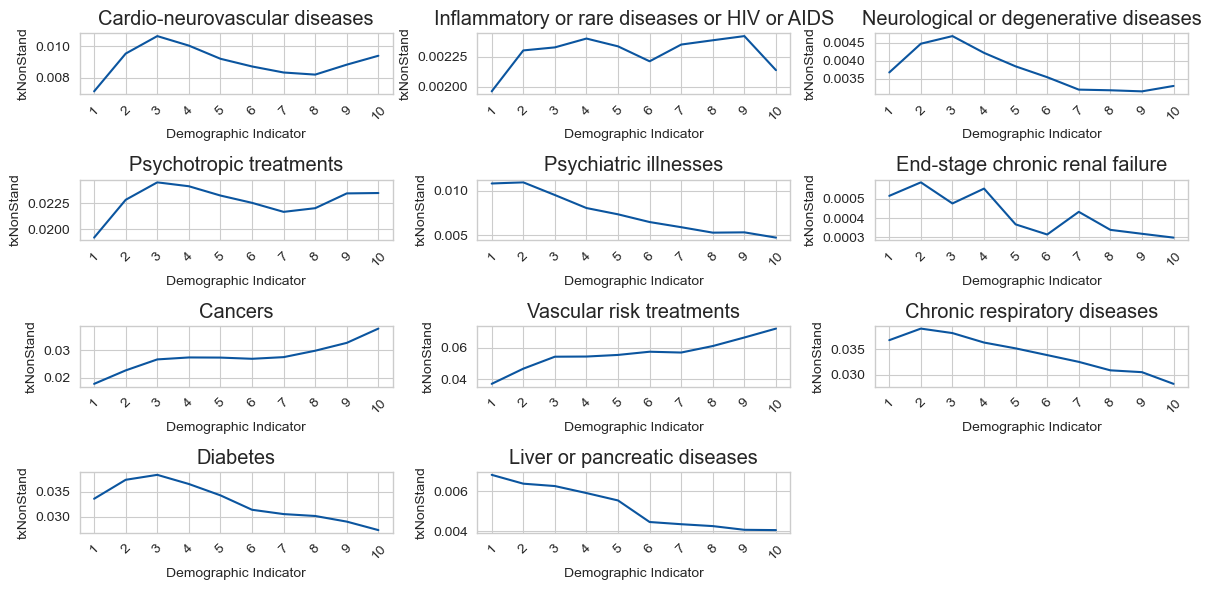

In [2086]:
pivot_table = pd.pivot_table(social_class.reset_index(),
                             index='Demographic_Indicator', columns='Disease_Group', values='txNonStand')


disease_groups = social_class['Disease_Group'].unique()

num_rows = 4  
num_cols = int(np.ceil(len(disease_groups) / num_rows))  

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 6))

axes = axes.flatten()

for i, disease_group in enumerate(disease_groups):
    sorted_pivot = pivot_table.sort_index()

    x_labels = sorted_pivot.index
    x_values = range(len(x_labels))
    axes[i].plot(x_values, sorted_pivot[disease_group])

    axes[i].set_xlabel('Demographic Indicator')
    axes[i].set_ylabel('txNonStand')
    axes[i].set_title(disease_group)
    axes[i].set_xticks(x_values)
    axes[i].set_xticklabels(x_labels, rotation=45)  

for j in range(len(disease_groups), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

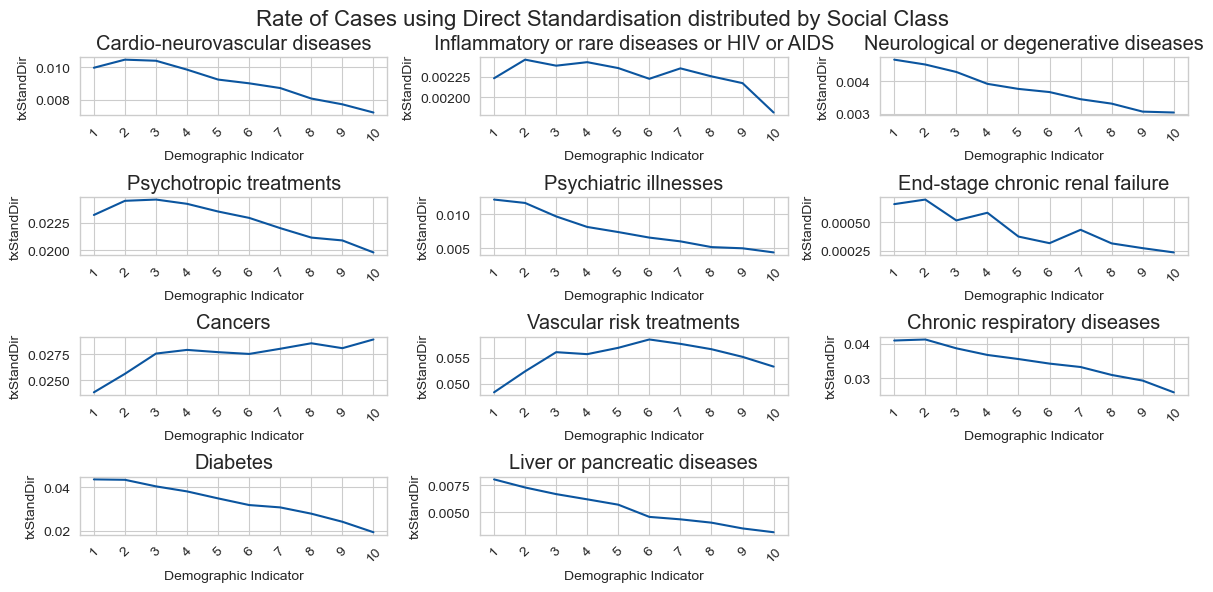

In [2087]:
pivot_table = pd.pivot_table(social_class.reset_index(),
                             index='Demographic_Indicator', columns='Disease_Group', values='txStandDir')

disease_groups = social_class['Disease_Group'].unique()

num_rows = 4  
num_cols = int(np.ceil(len(disease_groups) / num_rows))  

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 6))

axes = axes.flatten()

for i, disease_group in enumerate(disease_groups):
    sorted_pivot = pivot_table.sort_index()

    x_labels = sorted_pivot.index
    x_values = range(len(x_labels))
    axes[i].plot(x_values, sorted_pivot[disease_group])

    axes[i].set_xlabel('Demographic Indicator')
    axes[i].set_ylabel('txStandDir')
    axes[i].set_title(disease_group)
    axes[i].set_xticks(x_values)
    axes[i].set_xticklabels(x_labels, rotation=45)  

for j in range(len(disease_groups), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.subplots_adjust(top=0.9)
fig.suptitle('Rate of Cases using Direct Standardisation distributed by Social Class', fontsize=16)

plt.show()

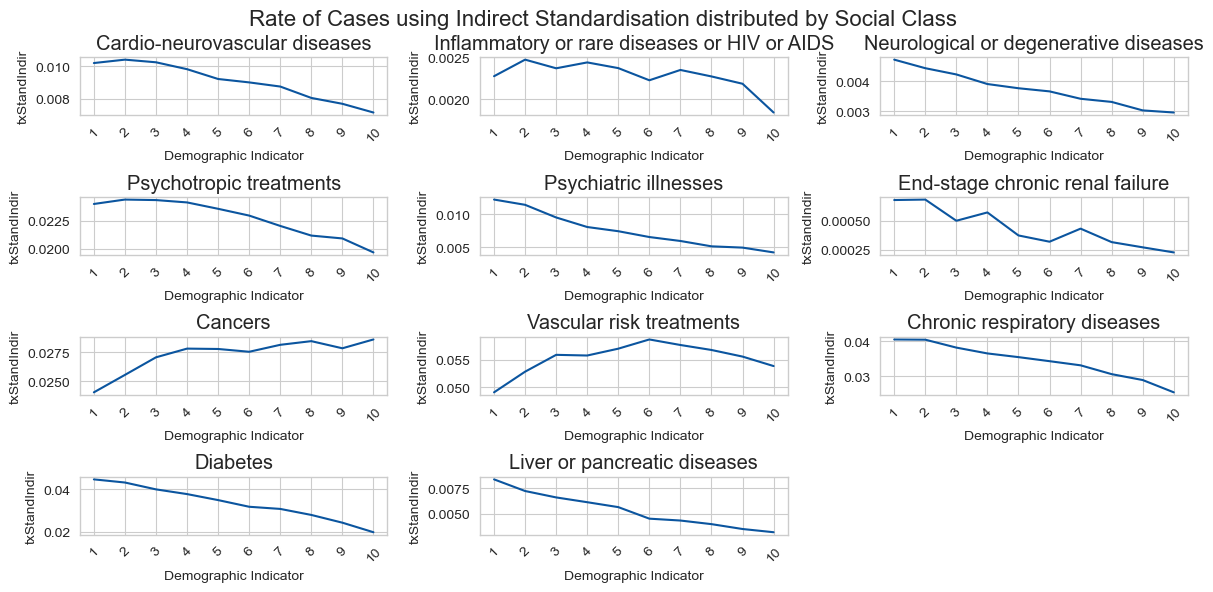

In [2088]:
pivot_table = pd.pivot_table(social_class.reset_index(),
                             index='Demographic_Indicator', columns='Disease_Group', values='txStandIndir')

disease_groups = social_class['Disease_Group'].unique()

num_rows = 4
num_cols = int(np.ceil(len(disease_groups) / num_rows))  

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 6))

axes = axes.flatten()

for i, disease_group in enumerate(disease_groups):
    sorted_pivot = pivot_table.sort_index()

    x_labels = sorted_pivot.index
    x_values = range(len(x_labels))
    axes[i].plot(x_values, sorted_pivot[disease_group])

    axes[i].set_xlabel('Demographic Indicator')
    axes[i].set_ylabel('txStandIndir')
    axes[i].set_title(disease_group)
    axes[i].set_xticks(x_values)
    axes[i].set_xticklabels(x_labels, rotation=45)  

for j in range(len(disease_groups), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.subplots_adjust(top=0.9)
fig.suptitle('Rate of Cases using Indirect Standardisation distributed by Social Class', fontsize=16)

plt.show()

In [2089]:
#SQL

sc_values = social_class['Demographic_Indicator'].unique()
sc_sql = pd.DataFrame(sc_values, columns=['sc_id'])

sc_values = {1: '10th decile (least affluent segment)',
             2: '2nd decile from bottom (second least affluent segment)',
             3: '3rd decile from bottom (third least affluent segment)',
             4: '4th decile from bottom (fourth least affluent segment)',
             5: '5th decile from bottom (fifth least affluent segment)',
             6: '5th decile from top (fifth most affluent segment)',
             7: '4th decile from top (fourth most affluent segment)',
             8: '3rd decile from top (third most affluent segment)',
             9: '2nd decile from top (second most affluent segment)',
             10: '10th decile (most affluent segment)'}

sc_sql['social_class'] = sc_sql['sc_id'].map(sc_values)

sc_sql

,sc_id,social_class
0,1,10th decile (least affluent segment)
1,2,2nd decile from bottom (second least affluent segment)
2,3,3rd decile from bottom (third least affluent segment)
3,4,4th decile from bottom (fourth least affluent segment)
4,5,5th decile from bottom (fifth least affluent segment)
5,6,5th decile from top (fifth most affluent segment)
6,7,4th decile from top (fourth most affluent segment)
7,8,3rd decile from top (third most affluent segment)
8,9,2nd decile from top (second most affluent segment)
9,10,10th decile (most affluent segment)


In [2090]:
d_values = diplome['Demographic_Indicator'].unique()
d_sql = pd.DataFrame(d_values, columns=['diploma_id'])

d_values = {'1': 'No degree',
            '2': 'Professional degree',
            '3': 'High school dgree',
            '4': 'Higher education'}

d_sql['education'] = d_sql['diploma_id'].map(d_values)

d_sql

,diploma_id,education
0,1,No degree
1,2,Professional degree
2,3,High school dgree
3,4,Higher education


In [2091]:
d_sql['diploma_id'] = d_sql['diploma_id'].astype('int')
d_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   diploma_id  4 non-null      int64 
 1   education   4 non-null      object
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


In [2092]:
j_values = job['Demographic_Indicator'].unique()
j_sql = pd.DataFrame(j_values, columns=['job_id'])

j_values = {'1': 'Farmers',
            '2': 'Craftsmen, merchants, business owners',
            '3': 'Executives and higher intellectual professions',
            '4': 'Intermediate professions',
            '5':'Employees',
            '6':'Workers',
            '7':'Retired',
            '8':'Others'}

j_sql['profession'] = j_sql['job_id'].map(j_values)

j_sql

,job_id,profession
0,1,Farmers
1,2,"Craftsmen, merchants, business owners"
2,3,Executives and higher intellectual professions
3,4,Intermediate professions
4,5,Employees
5,6,Workers
6,8,Others


In [2093]:
j_sql['job_id'] = j_sql['job_id'].astype('int')
j_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   job_id      7 non-null      int64 
 1   profession  7 non-null      object
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes


In [2094]:
g_values = gender['Demographic_Indicator'].unique()
g_sql = pd.DataFrame(g_values, columns=['gender'])
g_sql['gender_id']=pd.factorize(g_sql['gender'])[0] + 1
g_sql_order = ["gender_id", "gender"]
g_sql = g_sql[g_sql_order]
g_sql

,gender_id,gender
0,1,F
1,2,M


In [2095]:
t_values = data['Type'].unique()
t_sql = pd.DataFrame(t_values, columns=['type'])
t_sql['type_id']=pd.factorize(t_sql['type'])[0] + 1
t_sql_order = ["type_id", "type"]
t_sql = t_sql[t_sql_order]
t_sql

,type_id,type
0,1,prevalence
1,2,incidence


In [2096]:
di_values = df3['Disease_Group'].unique()
di_sql = pd.DataFrame(di_values, columns=['disease_group'])
di_sql['disease_group_id']=pd.factorize(di_sql['disease_group'])[0] + 1
di_sql_order = ["disease_group_id", "disease_group"]
di_sql = di_sql[di_sql_order]
di_sql

,disease_group_id,disease_group
0,1,Cardio-neurovascular diseases
1,2,Inflammatory or rare diseases or HIV or AIDS
2,3,Neurological or degenerative diseases
3,4,Psychotropic treatments
4,5,Psychiatric illnesses
5,6,End-stage chronic renal failure
6,7,Cancers
7,8,Vascular risk treatments
8,9,Chronic respiratory diseases
9,10,Diabetes


In [2097]:
main_sc = social_class[['Type','Demographic_Indicator','Disease_Group','weights','weights_total','txNonStand','txStandDir','txStandIndir']]
main_sc

,Type,Demographic_Indicator,Disease_Group,weights,weights_total,txNonStand,txStandDir,txStandIndir
0,prevalence,1,Cardio-neurovascular diseases,13621.00,1374418.26,0.01,0.01,0.01
1,prevalence,1,Cardio-neurovascular diseases,30886.50,1374418.26,0.02,0.03,0.03
2,prevalence,1,Cardio-neurovascular diseases,6482.67,1374418.26,0.00,0.01,0.01
3,prevalence,1,Inflammatory or rare diseases or HIV or AIDS,2080.35,1374418.26,0.00,0.00,0.00
4,prevalence,1,Neurological or degenerative diseases,4457.53,1374418.26,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
46043,prevalence,10,Psychiatric illnesses,3334.98,6536008.55,0.00,0.00,0.00
46044,prevalence,10,Psychiatric illnesses,90839.29,6536008.55,0.01,0.01,0.01
46045,prevalence,10,End-stage chronic renal failure,5017.77,6536008.55,0.00,0.00,0.00
46046,prevalence,10,End-stage chronic renal failure,3758.22,6536008.55,0.00,0.00,0.00


In [2098]:
main_sc['Type'] = main_sc['Type'].replace(['prevalence','incidence'],[1,2])
main_sc

/var/folders/vf/1n65j1vx36v93w2m9fv4pfyh0000gn/T/ipykernel_325/3028376383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_sc['Type'] = main_sc['Type'].replace(['prevalence','incidence'],[1,2])


,Type,Demographic_Indicator,Disease_Group,weights,weights_total,txNonStand,txStandDir,txStandIndir
0,1,1,Cardio-neurovascular diseases,13621.00,1374418.26,0.01,0.01,0.01
1,1,1,Cardio-neurovascular diseases,30886.50,1374418.26,0.02,0.03,0.03
2,1,1,Cardio-neurovascular diseases,6482.67,1374418.26,0.00,0.01,0.01
3,1,1,Inflammatory or rare diseases or HIV or AIDS,2080.35,1374418.26,0.00,0.00,0.00
4,1,1,Neurological or degenerative diseases,4457.53,1374418.26,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
46043,1,10,Psychiatric illnesses,3334.98,6536008.55,0.00,0.00,0.00
46044,1,10,Psychiatric illnesses,90839.29,6536008.55,0.01,0.01,0.01
46045,1,10,End-stage chronic renal failure,5017.77,6536008.55,0.00,0.00,0.00
46046,1,10,End-stage chronic renal failure,3758.22,6536008.55,0.00,0.00,0.00


In [2099]:
main_sc['Disease_Group'].unique()

array(['Cardio-neurovascular diseases',
       'Inflammatory or rare diseases or HIV or AIDS',
       'Neurological or degenerative diseases', 'Psychotropic treatments',
       'Psychiatric illnesses', 'End-stage chronic renal failure',
       'Cancers', 'Vascular risk treatments',
       'Chronic respiratory diseases', 'Diabetes',
       'Liver or pancreatic diseases'], dtype=object)

In [2100]:
main_sc['Disease_Group'] = main_sc['Disease_Group'].replace(['Cardio-neurovascular diseases',
       'Inflammatory or rare diseases or HIV or AIDS',
       'Neurological or degenerative diseases', 'Psychotropic treatments',
       'Psychiatric illnesses', 'End-stage chronic renal failure',
       'Cancers', 'Vascular risk treatments',
       'Chronic respiratory diseases', 'Diabetes',
       'Liver or pancreatic diseases'],[1,2,3,4,5,6,7,8,9,10,11])
main_sc

/var/folders/vf/1n65j1vx36v93w2m9fv4pfyh0000gn/T/ipykernel_325/2696864647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_sc['Disease_Group'] = main_sc['Disease_Group'].replace(['Cardio-neurovascular diseases',


,Type,Demographic_Indicator,Disease_Group,weights,weights_total,txNonStand,txStandDir,txStandIndir
0,1,1,1,13621.00,1374418.26,0.01,0.01,0.01
1,1,1,1,30886.50,1374418.26,0.02,0.03,0.03
2,1,1,1,6482.67,1374418.26,0.00,0.01,0.01
3,1,1,2,2080.35,1374418.26,0.00,0.00,0.00
4,1,1,3,4457.53,1374418.26,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
46043,1,10,5,3334.98,6536008.55,0.00,0.00,0.00
46044,1,10,5,90839.29,6536008.55,0.01,0.01,0.01
46045,1,10,6,5017.77,6536008.55,0.00,0.00,0.00
46046,1,10,6,3758.22,6536008.55,0.00,0.00,0.00


In [2101]:
main_sc.rename(columns = {'Type':'type_id', 'Demographic_Indicator':'sc_id', 'Disease_Group':'disease_group_id'}, inplace = True)
main_sc

/var/folders/vf/1n65j1vx36v93w2m9fv4pfyh0000gn/T/ipykernel_325/3365603559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_sc.rename(columns = {'Type':'type_id', 'Demographic_Indicator':'sc_id', 'Disease_Group':'disease_group_id'}, inplace = True)


,type_id,sc_id,disease_group_id,weights,weights_total,txNonStand,txStandDir,txStandIndir
0,1,1,1,13621.00,1374418.26,0.01,0.01,0.01
1,1,1,1,30886.50,1374418.26,0.02,0.03,0.03
2,1,1,1,6482.67,1374418.26,0.00,0.01,0.01
3,1,1,2,2080.35,1374418.26,0.00,0.00,0.00
4,1,1,3,4457.53,1374418.26,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
46043,1,10,5,3334.98,6536008.55,0.00,0.00,0.00
46044,1,10,5,90839.29,6536008.55,0.01,0.01,0.01
46045,1,10,6,5017.77,6536008.55,0.00,0.00,0.00
46046,1,10,6,3758.22,6536008.55,0.00,0.00,0.00


In [2102]:
main_d = diplome[['Type','Demographic_Indicator','Disease_Group','weights','weights_total','txNonStand','txStandDir','txStandIndir']]
main_d

,Type,Demographic_Indicator,Disease_Group,weights,weights_total,txNonStand,txStandDir,txStandIndir
2070,incidence,1,Inflammatory or rare diseases or HIV or AIDS,56989.19,19699537.15,0.00,0.00,0.00
2071,incidence,1,Diabetes,155385.15,17470335.99,0.01,0.01,0.01
2072,incidence,1,Cardio-neurovascular diseases,35224.71,20224148.76,0.00,0.00,0.00
2073,incidence,1,Cardio-neurovascular diseases,165958.27,20103411.89,0.01,0.00,0.00
2074,incidence,1,Cardio-neurovascular diseases,127622.46,19899115.05,0.01,0.00,0.00
...,...,...,...,...,...,...,...,...
36845,prevalence,4,Neurological or degenerative diseases,51382.23,14099276.74,0.00,0.01,0.01
36846,prevalence,4,Neurological or degenerative diseases,8987.72,14099276.74,0.00,0.00,0.00
36847,prevalence,4,Psychiatric illnesses,52363.37,14099276.74,0.00,0.00,0.00
36848,prevalence,4,Psychiatric illnesses,228120.78,14099276.74,0.02,0.02,0.02


In [2103]:
main_d['Type'] = main_d['Type'].replace(['prevalence','incidence'],[1,2])
main_d['Disease_Group'] = main_d['Disease_Group'].replace(['Cardio-neurovascular diseases',
       'Inflammatory or rare diseases or HIV or AIDS',
       'Neurological or degenerative diseases', 'Psychotropic treatments',
       'Psychiatric illnesses', 'End-stage chronic renal failure',
       'Cancers', 'Vascular risk treatments',
       'Chronic respiratory diseases', 'Diabetes',
       'Liver or pancreatic diseases'],[1,2,3,4,5,6,7,8,9,10,11])
main_d.rename(columns = {'Type':'type_id', 'Demographic_Indicator':'diploma_id', 'Disease_Group':'disease_group_id'}, inplace = True)
main_d

/var/folders/vf/1n65j1vx36v93w2m9fv4pfyh0000gn/T/ipykernel_325/1969590496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_d['Type'] = main_d['Type'].replace(['prevalence','incidence'],[1,2])
/var/folders/vf/1n65j1vx36v93w2m9fv4pfyh0000gn/T/ipykernel_325/1969590496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_d['Disease_Group'] = main_d['Disease_Group'].replace(['Cardio-neurovascular diseases',
/var/folders/vf/1n65j1vx36v93w2m9fv4pfyh0000gn/T/ipykernel_325/1969590496.py:9: SettingWithCop

,type_id,diploma_id,disease_group_id,weights,weights_total,txNonStand,txStandDir,txStandIndir
2070,2,1,2,56989.19,19699537.15,0.00,0.00,0.00
2071,2,1,10,155385.15,17470335.99,0.01,0.01,0.01
2072,2,1,1,35224.71,20224148.76,0.00,0.00,0.00
2073,2,1,1,165958.27,20103411.89,0.01,0.00,0.00
2074,2,1,1,127622.46,19899115.05,0.01,0.00,0.00
...,...,...,...,...,...,...,...,...
36845,1,4,3,51382.23,14099276.74,0.00,0.01,0.01
36846,1,4,3,8987.72,14099276.74,0.00,0.00,0.00
36847,1,4,5,52363.37,14099276.74,0.00,0.00,0.00
36848,1,4,5,228120.78,14099276.74,0.02,0.02,0.02


In [2104]:
main_d['diploma_id'] = main_d['diploma_id'].astype('int')
main_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1248 entries, 2070 to 36849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type_id           1248 non-null   int64  
 1   diploma_id        1248 non-null   int64  
 2   disease_group_id  1248 non-null   int64  
 3   weights           1248 non-null   float64
 4   weights_total     1248 non-null   float64
 5   txNonStand        1248 non-null   float64
 6   txStandDir        1248 non-null   float64
 7   txStandIndir      1248 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 87.8 KB


/var/folders/vf/1n65j1vx36v93w2m9fv4pfyh0000gn/T/ipykernel_325/185455386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_d['diploma_id'] = main_d['diploma_id'].astype('int')


In [2105]:
main_j = job[['Type','Demographic_Indicator','Disease_Group','weights','weights_total','txNonStand','txStandDir','txStandIndir']]
main_j

,Type,Demographic_Indicator,Disease_Group,weights,weights_total,txNonStand,txStandDir,txStandIndir
2131,incidence,1,Psychiatric illnesses,26739.45,2117840.15,0.01,0.00,0.01
2132,incidence,1,Chronic respiratory diseases,39949.61,2049009.18,0.02,0.01,0.01
2133,incidence,1,Cardio-neurovascular diseases,12988.21,2225973.35,0.01,0.00,0.00
2134,incidence,1,Cardio-neurovascular diseases,5292.53,2202593.97,0.00,0.00,0.00
2135,incidence,1,Cardio-neurovascular diseases,24510.13,2216492.64,0.01,0.00,0.00
...,...,...,...,...,...,...,...,...
36951,prevalence,8,Inflammatory or rare diseases or HIV or AIDS,9905.34,19373890.61,0.00,0.00,0.00
36952,prevalence,8,Neurological or degenerative diseases,78832.03,19373890.61,0.00,0.01,0.01
36953,prevalence,8,Neurological or degenerative diseases,125896.29,19373890.61,0.01,0.02,0.01
36954,prevalence,8,Psychotropic treatments,70468.89,19373890.61,0.00,0.01,0.01


In [2106]:
main_j['Type'] = main_j['Type'].replace(['prevalence','incidence'],[1,2])
main_j['Disease_Group'] = main_j['Disease_Group'].replace(['Cardio-neurovascular diseases',
       'Inflammatory or rare diseases or HIV or AIDS',
       'Neurological or degenerative diseases', 'Psychotropic treatments',
       'Psychiatric illnesses', 'End-stage chronic renal failure',
       'Cancers', 'Vascular risk treatments',
       'Chronic respiratory diseases', 'Diabetes',
       'Liver or pancreatic diseases'],[1,2,3,4,5,6,7,8,9,10,11])
main_j.rename(columns = {'Type':'type_id', 'Demographic_Indicator':'job_id', 'Disease_Group':'disease_group_id'}, inplace = True)
main_j

/var/folders/vf/1n65j1vx36v93w2m9fv4pfyh0000gn/T/ipykernel_325/1111672747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_j['Type'] = main_j['Type'].replace(['prevalence','incidence'],[1,2])
/var/folders/vf/1n65j1vx36v93w2m9fv4pfyh0000gn/T/ipykernel_325/1111672747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_j['Disease_Group'] = main_j['Disease_Group'].replace(['Cardio-neurovascular diseases',
/var/folders/vf/1n65j1vx36v93w2m9fv4pfyh0000gn/T/ipykernel_325/1111672747.py:9: SettingWithCop

,type_id,job_id,disease_group_id,weights,weights_total,txNonStand,txStandDir,txStandIndir
2131,2,1,5,26739.45,2117840.15,0.01,0.00,0.01
2132,2,1,9,39949.61,2049009.18,0.02,0.01,0.01
2133,2,1,1,12988.21,2225973.35,0.01,0.00,0.00
2134,2,1,1,5292.53,2202593.97,0.00,0.00,0.00
2135,2,1,1,24510.13,2216492.64,0.01,0.00,0.00
...,...,...,...,...,...,...,...,...
36951,1,8,2,9905.34,19373890.61,0.00,0.00,0.00
36952,1,8,3,78832.03,19373890.61,0.00,0.01,0.01
36953,1,8,3,125896.29,19373890.61,0.01,0.02,0.01
36954,1,8,4,70468.89,19373890.61,0.00,0.01,0.01


In [2107]:
main_j['job_id'] = main_j['job_id'].astype('int')
main_j.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2184 entries, 2131 to 36955
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type_id           2184 non-null   int64  
 1   job_id            2184 non-null   int64  
 2   disease_group_id  2184 non-null   int64  
 3   weights           2184 non-null   float64
 4   weights_total     2184 non-null   float64
 5   txNonStand        2184 non-null   float64
 6   txStandDir        2184 non-null   float64
 7   txStandIndir      2184 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 153.6 KB


/var/folders/vf/1n65j1vx36v93w2m9fv4pfyh0000gn/T/ipykernel_325/2379815268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_j['job_id'] = main_j['job_id'].astype('int')


In [2108]:
main_g = gender[['Type','Demographic_Indicator','Disease_Group','weights','weights_total','txNonStand','txStandDir','txStandIndir']]
main_g

,Type,Demographic_Indicator,Disease_Group,weights,weights_total,txNonStand,txStandDir,txStandIndir
181,prevalence,F,Inflammatory or rare diseases or HIV or AIDS,116843.95,6015875.84,0.02,0.02,0.02
182,prevalence,F,End-stage chronic renal failure,6093.20,6015875.84,0.00,0.00,0.00
183,prevalence,F,Chronic respiratory diseases,322505.62,6015875.84,0.05,0.05,0.05
184,prevalence,F,Diabetes,272942.42,6015875.84,0.05,0.04,0.04
185,prevalence,F,Cardio-neurovascular diseases,11095.77,6015875.84,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
45386,prevalence,M,Inflammatory or rare diseases or HIV or AIDS,591.24,322778.46,0.00,0.00,0.00
45387,prevalence,M,Neurological or degenerative diseases,1910.72,322778.46,0.01,0.01,0.01
45388,prevalence,M,Psychotropic treatments,6522.91,322778.46,0.02,0.02,0.02
45389,prevalence,M,Psychiatric illnesses,2005.00,322778.46,0.01,0.01,0.01


In [2109]:
main_g['Type'] = main_g['Type'].replace(['prevalence','incidence'],[1,2])
main_g['Disease_Group'] = main_g['Disease_Group'].replace(['Cardio-neurovascular diseases',
       'Inflammatory or rare diseases or HIV or AIDS',
       'Neurological or degenerative diseases', 'Psychotropic treatments',
       'Psychiatric illnesses', 'End-stage chronic renal failure',
       'Cancers', 'Vascular risk treatments',
       'Chronic respiratory diseases', 'Diabetes',
       'Liver or pancreatic diseases'],[1,2,3,4,5,6,7,8,9,10,11])
main_g['Demographic_Indicator'] = main_g['Demographic_Indicator'].replace(['F','M'],[1,2])
main_g.rename(columns = {'Type':'type_id', 'Demographic_Indicator':'gender_id', 'Disease_Group':'disease_group_id'}, inplace = True)
main_g

/var/folders/vf/1n65j1vx36v93w2m9fv4pfyh0000gn/T/ipykernel_325/821390045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_g['Type'] = main_g['Type'].replace(['prevalence','incidence'],[1,2])
/var/folders/vf/1n65j1vx36v93w2m9fv4pfyh0000gn/T/ipykernel_325/821390045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_g['Disease_Group'] = main_g['Disease_Group'].replace(['Cardio-neurovascular diseases',
/var/folders/vf/1n65j1vx36v93w2m9fv4pfyh0000gn/T/ipykernel_325/821390045.py:9: SettingWithCopyWa

,type_id,gender_id,disease_group_id,weights,weights_total,txNonStand,txStandDir,txStandIndir
181,1,1,2,116843.95,6015875.84,0.02,0.02,0.02
182,1,1,6,6093.20,6015875.84,0.00,0.00,0.00
183,1,1,9,322505.62,6015875.84,0.05,0.05,0.05
184,1,1,10,272942.42,6015875.84,0.05,0.04,0.04
185,1,1,1,11095.77,6015875.84,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
45386,1,2,2,591.24,322778.46,0.00,0.00,0.00
45387,1,2,3,1910.72,322778.46,0.01,0.01,0.01
45388,1,2,4,6522.91,322778.46,0.02,0.02,0.02
45389,1,2,5,2005.00,322778.46,0.01,0.01,0.01


In [2110]:
#conda/pip install pymysql


In [2111]:
import pymysql.cursors
from sqlalchemy import create_engine, MetaData
from sqlalchemy.schema import CreateTable
from sqlalchemy import text
import getpass

In [2112]:
#prompt user to enter MySQL root password
#sql_pass = getpass.getpass()

In [2113]:
#create connection string and engine to connect to MySQL database
#connection_string = 'mysql+pymysql://root:' + sql_pass + '@localhost:3306/chronic_diseases'
#engine = create_engine(connection_string)

In [2114]:
#sc_sql.to_sql('sc_def', engine, 'chronic_diseases', if_exists='replace', index=False)
#d_sql.to_sql('edu_def', engine, 'chronic_diseases', if_exists='replace', index=False)
#j_sql.to_sql('pro_def', engine, 'chronic_diseases', if_exists='replace', index=False)
#g_sql.to_sql('gen_def', engine, 'chronic_diseases', if_exists='replace', index=False)
#t_sql.to_sql('type', engine, 'chronic_diseases', if_exists='replace', index=False)
#di_sql.to_sql('disease_def', engine, 'chronic_diseases', if_exists='replace', index=False)
#main_sc.to_sql('sc_main', engine, 'chronic_diseases', if_exists='replace', index=False)
#main_d.to_sql('edu_main', engine, 'chronic_diseases', if_exists='replace', index=False)
#main_j.to_sql('pro_main', engine, 'chronic_diseases', if_exists='replace', index=False)
#main_g.to_sql('gen_main', engine, 'chronic_diseases', if_exists='replace', index=False)

In [2115]:
sc_psy.corr()

/var/folders/vf/1n65j1vx36v93w2m9fv4pfyh0000gn/T/ipykernel_325/720699681.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sc_psy.corr()


,Demographic_Indicator,weights,weights_total,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
Demographic_Indicator,1.00,0.02,0.01,0.03,-0.05,-0.06,-0.04,-0.05,-0.06,-0.05
weights,0.02,1.00,0.77,0.38,0.37,0.44,0.30,0.37,0.44,0.31
weights_total,0.01,0.77,1.00,0.04,0.05,0.13,-0.03,0.05,0.13,-0.03
txNonStand,0.03,0.38,0.04,1.00,0.99,0.97,0.98,0.99,0.97,0.98
txStandDir,-0.05,0.37,0.05,0.99,1.00,0.98,0.99,1.00,0.98,0.99
txStandDirModBB,-0.06,0.44,0.13,0.97,0.98,1.00,0.94,0.98,1.00,0.94
txStandDirModBH,-0.04,0.30,-0.03,0.98,0.99,0.94,1.00,0.98,0.94,1.00
txStandIndir,-0.05,0.37,0.05,0.99,1.00,0.98,0.98,1.00,0.98,0.99
txStandIndirModBB,-0.06,0.44,0.13,0.97,0.98,1.00,0.94,0.98,1.00,0.94
txStandIndirModBH,-0.05,0.31,-0.03,0.98,0.99,0.94,1.00,0.99,0.94,1.00


In [2116]:
# MACHINE LEARNING

sc_psy

,Type,Disease_Name,Disease_Group,Demographic,Demographic_Indicator,weights,weights_total,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
2663,incidence,Traitements psychotropes,Psychotropic treatments,Social Class,1,218766.55,11571954.18,0.02,0.02,0.02,0.02,0.02,0.02,0.02
2675,incidence,Traitements hypnotiques,Psychotropic treatments,Social Class,1,61497.39,12160496.67,0.01,0.01,0.01,0.01,0.01,0.01,0.01
2680,incidence,Traitements psychotropes,Psychotropic treatments,Social Class,2,242739.06,11235129.71,0.02,0.02,0.02,0.02,0.02,0.02,0.02
2697,incidence,Traitements antidépresseurs ou régulateurs de l'humeur,Psychotropic treatments,Social Class,2,126362.29,11838598.78,0.01,0.01,0.01,0.01,0.01,0.01,0.01
2698,incidence,Traitements hypnotiques,Psychotropic treatments,Social Class,2,67534.68,11972302.35,0.01,0.01,0.01,0.01,0.01,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36238,incidence,Traitements antidépresseurs ou régulateurs de l'humeur,Psychotropic treatments,Social Class,8,52063.81,6100546.48,0.01,0.01,0.01,0.01,0.01,0.01,0.01
36257,incidence,Traitements antidépresseurs ou régulateurs de l'humeur,Psychotropic treatments,Social Class,9,57684.08,6086222.62,0.01,0.01,0.01,0.01,0.01,0.01,0.01
36267,incidence,Traitements psychotropes,Psychotropic treatments,Social Class,10,109052.98,5932326.60,0.02,0.02,0.01,0.02,0.02,0.01,0.02
36278,incidence,Traitements antidépresseurs ou régulateurs de l'humeur,Psychotropic treatments,Social Class,10,57884.32,6138722.47,0.01,0.01,0.01,0.01,0.01,0.01,0.01


In [2117]:
sc_psy = sc_psy.drop(['Type','Disease_Group','Demographic','weights_total','txStandDirModBB','txNonStand','txStandDirModBH','txStandIndirModBB','txStandIndirModBH'], axis=1)
sc_psy

,Disease_Name,Demographic_Indicator,weights,txStandDir,txStandIndir
2663,Traitements psychotropes,1,218766.55,0.02,0.02
2675,Traitements hypnotiques,1,61497.39,0.01,0.01
2680,Traitements psychotropes,2,242739.06,0.02,0.02
2697,Traitements antidépresseurs ou régulateurs de l'humeur,2,126362.29,0.01,0.01
2698,Traitements hypnotiques,2,67534.68,0.01,0.01
...,...,...,...,...,...
36238,Traitements antidépresseurs ou régulateurs de l'humeur,8,52063.81,0.01,0.01
36257,Traitements antidépresseurs ou régulateurs de l'humeur,9,57684.08,0.01,0.01
36267,Traitements psychotropes,10,109052.98,0.02,0.02
36278,Traitements antidépresseurs ou régulateurs de l'humeur,10,57884.32,0.01,0.01


In [2118]:
psy_ml = pd.get_dummies(sc_psy, columns=['Disease_Name'])

psy_ml

,Demographic_Indicator,weights,txStandDir,txStandIndir,Disease_Name_Traitements antidépresseurs ou régulateurs de l'humeur,Disease_Name_Traitements anxiolytiques,Disease_Name_Traitements hypnotiques,Disease_Name_Traitements neuroleptiques,Disease_Name_Traitements psychotropes
2663,1,218766.55,0.02,0.02,0,0,0,0,1
2675,1,61497.39,0.01,0.01,0,0,1,0,0
2680,2,242739.06,0.02,0.02,0,0,0,0,1
2697,2,126362.29,0.01,0.01,1,0,0,0,0
2698,2,67534.68,0.01,0.01,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
36238,8,52063.81,0.01,0.01,1,0,0,0,0
36257,9,57684.08,0.01,0.01,1,0,0,0,0
36267,10,109052.98,0.02,0.02,0,0,0,0,1
36278,10,57884.32,0.01,0.01,1,0,0,0,0


In [2119]:
#psy_ml.rename(columns={"Disease_Name_Traitements antidépresseurs ou régulateurs de l'humeur":'Antidepressants or mood stabilizers treament',
                               #'Traitements anxiolytiques':'Anxiolytic treatments','Traitements hypnotiques':'Hypnotic treatments',
                               #'Traitements neuroleptiques':'Neuroleptic treatments','Traitements psychotropes':'Psychotropic treatments'}, inplace = True)

In [2120]:
psy_ml['Disease_Name_Traitements neuroleptiques'].unique()

array([0, 1], dtype=uint8)

In [2121]:
from sklearn.model_selection import train_test_split

features =['Demographic_Indicator',"Disease_Name_Traitements antidépresseurs ou régulateurs de l'humeur",'Disease_Name_Traitements anxiolytiques','Disease_Name_Traitements hypnotiques','Disease_Name_Traitements neuroleptiques','Disease_Name_Traitements psychotropes']
target =['weights']

X = psy_ml[features]
y = psy_ml[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set - X shape:", X_train.shape)
print("Training set - y shape:", y_train.shape)
print("Testing set - X shape:", X_test.shape)
print("Testing set - y shape:", y_test.shape)

Training set - X shape: (800, 6)
Training set - y shape: (800, 1)
Testing set - X shape: (200, 6)
Testing set - y shape: (200, 1)


In [2122]:
X_test.columns

Index(['Demographic_Indicator',
       'Disease_Name_Traitements antidépresseurs ou régulateurs de l'humeur',
       'Disease_Name_Traitements anxiolytiques',
       'Disease_Name_Traitements hypnotiques',
       'Disease_Name_Traitements neuroleptiques',
       'Disease_Name_Traitements psychotropes'],
      dtype='object')

In [2123]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(psy_ml[['Demographic_Indicator',"Disease_Name_Traitements antidépresseurs ou régulateurs de l'humeur",'Disease_Name_Traitements anxiolytiques','Disease_Name_Traitements hypnotiques','Disease_Name_Traitements neuroleptiques','Disease_Name_Traitements psychotropes']], psy_ml['weights'], test_size=0.2, random_state=42)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = regression_model.score(X_test, y_test)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r_squared)

Mean Squared Error (MSE): 1185094010.4238503
Root Mean Squared Error (RMSE): 34425.19441374079
R-squared: 0.09330110516750412


In [2124]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

dt_regressor = DecisionTreeRegressor(random_state=42)

dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

Mean Squared Error (MSE): 1316895047.1464257
Root Mean Squared Error (RMSE): 36289.04858419997
R-squared: -0.00753802935094261


In [2125]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

Mean Squared Error (MSE): 1313788803.5539427
Root Mean Squared Error (RMSE): 36246.224680012434
R-squared: -0.005161485711693725


In [2126]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

xgb_reg = xgb.XGBRegressor()

xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

Mean Squared Error (MSE): 1316895056.0203526
Root Mean Squared Error (RMSE): 36289.048706467256
R-squared: -0.007538036140260385


In [2127]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svr = SVR()

svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

Mean Squared Error (MSE): 1427536954.5857
Root Mean Squared Error (RMSE): 37782.76001810482
R-squared: -0.09218860923318362


In [2128]:
from sklearn.svm import OneClassSVM as onesvm

# Fit it to the training data and score the test data
svm_detector = onesvm().fit(X_train)
scores = svm_detector.score_samples(X_test)

In [2129]:
from sklearn.ensemble import IsolationForest as isof

# Fit it to the training data and score the test data
svm_detector = isof().fit(X_train)
scores = svm_detector.score_samples(X_test)

In [2130]:
from sklearn.neighbors import LocalOutlierFactor as lof

# Fit it to the training data and score the test data
lof_detector = lof(novelty=True).fit(X_train)
scores = lof_detector.score_samples(X_test)

/Users/talia/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [2131]:
# Fit a one-class SVM detector and score the test data
nov_det = onesvm().fit(X_train)
scores = nov_det.score_samples(X_test)

# Find the observed proportion of outliers in the test data
prop = np.mean(y_test==1.0)

# Compute the appropriate threshold
threshold = 0.0
y_test = (y_test > threshold).astype(int)
#predictions = (scores > threshold).astype(int)

# Print the confusion matrix for the thresholded scores
print(confusion_matrix(y_test, scores > threshold))

[[  0   1]
 [  0 199]]


In [2132]:
nov_det = OneClassSVM().fit(X_train)
scores = nov_det.score_samples(X_test)

# Define a threshold to convert the continuous values to binary labels
threshold = 0.0
y_test_binary = (y_test > threshold).astype(int)
predictions = (scores > threshold).astype(int)

# Print the confusion matrix for the binary predictions
print(confusion_matrix(y_test_binary, predictions))

[[  0   1]
 [  0 199]]


In [2133]:
# Import DistanceMetric as dm
from sklearn.neighbors import DistanceMetric as dm

# Find the Euclidean distance between all pairs
dist_eucl = dm.get_metric('euclidean').pairwise(X[['Demographic_Indicator',"Disease_Name_Traitements antidépresseurs ou régulateurs de l'humeur",'Disease_Name_Traitements anxiolytiques','Disease_Name_Traitements hypnotiques','Disease_Name_Traitements neuroleptiques','Disease_Name_Traitements psychotropes']])

# Find the Hamming distance between all pairs
dist_hamm = dm.get_metric('hamming').pairwise(X[['Demographic_Indicator',"Disease_Name_Traitements antidépresseurs ou régulateurs de l'humeur",'Disease_Name_Traitements anxiolytiques','Disease_Name_Traitements hypnotiques','Disease_Name_Traitements neuroleptiques','Disease_Name_Traitements psychotropes']])


# Find the Chebyshev distance between all pairs
dist_cheb = dm.get_metric('chebyshev').pairwise(X[['Demographic_Indicator',"Disease_Name_Traitements antidépresseurs ou régulateurs de l'humeur",'Disease_Name_Traitements anxiolytiques','Disease_Name_Traitements hypnotiques','Disease_Name_Traitements neuroleptiques','Disease_Name_Traitements psychotropes']])

/Users/talia/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(
/Users/talia/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(
/Users/talia/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


In [2134]:
print(dist_eucl)
print(dist_hamm) 
print(dist_cheb)

[[0.         1.41421356 1.         ... 9.         9.11043358 9.11043358]
 [1.41421356 0.         1.73205081 ... 9.11043358 9.11043358 9.11043358]
 [1.         1.73205081 0.         ... 8.         8.1240384  8.1240384 ]
 ...
 [9.         9.11043358 8.         ... 0.         1.41421356 1.41421356]
 [9.11043358 9.11043358 8.1240384  ... 1.41421356 0.         1.41421356]
 [9.11043358 9.11043358 8.1240384  ... 1.41421356 1.41421356 0.        ]]
[[0.         0.33333333 0.16666667 ... 0.16666667 0.5        0.5       ]
 [0.33333333 0.         0.5        ... 0.5        0.5        0.5       ]
 [0.16666667 0.5        0.         ... 0.16666667 0.5        0.5       ]
 ...
 [0.16666667 0.5        0.16666667 ... 0.         0.33333333 0.33333333]
 [0.5        0.5        0.5        ... 0.33333333 0.         0.33333333]
 [0.5        0.5        0.5        ... 0.33333333 0.33333333 0.        ]]
[[0. 1. 1. ... 9. 9. 9.]
 [1. 0. 1. ... 9. 9. 9.]
 [1. 1. 0. ... 8. 8. 8.]
 ...
 [9. 9. 8. ... 0. 1. 1.]
 [9. 9.

In [2135]:
# Compute outliers according to the Euclidean metric
out_eucl = lof(metric='euclidean').fit_predict(X[['Demographic_Indicator',"Disease_Name_Traitements antidépresseurs ou régulateurs de l'humeur",'Disease_Name_Traitements anxiolytiques','Disease_Name_Traitements hypnotiques','Disease_Name_Traitements neuroleptiques','Disease_Name_Traitements psychotropes']])


# Compute outliers according to the Hamming metric
out_hamm = lof(metric='hamming').fit_predict(X[['Demographic_Indicator',"Disease_Name_Traitements antidépresseurs ou régulateurs de l'humeur",'Disease_Name_Traitements anxiolytiques','Disease_Name_Traitements hypnotiques','Disease_Name_Traitements neuroleptiques','Disease_Name_Traitements psychotropes']])


# Compute outliers according to the Jaccard metric
out_jacc = lof(metric='jaccard').fit_predict(X[['Demographic_Indicator',"Disease_Name_Traitements antidépresseurs ou régulateurs de l'humeur",'Disease_Name_Traitements anxiolytiques','Disease_Name_Traitements hypnotiques','Disease_Name_Traitements neuroleptiques','Disease_Name_Traitements psychotropes']])


# Find if all three metrics agree on any one datapoint
print(any(out_jacc + out_hamm + out_eucl == -3))

False


In [2136]:
#There is no datapoint that all three metrics flag as an outlier. 
#So choosing a distance metric should be done with great caution! 
#You now have a concrete understanding of the effect of distance metrics on outlier detection.

In [2137]:
features =['weights','txStandDir','txStandIndir','Demographic_Indicator',"Disease_Name_Traitements antidépresseurs ou régulateurs de l'humeur",'Disease_Name_Traitements anxiolytiques','Disease_Name_Traitements hypnotiques','Disease_Name_Traitements neuroleptiques','Disease_Name_Traitements psychotropes']
target =['Demographic_Indicator']

X = psy_ml[features]
y = psy_ml[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set - X shape:", X_train.shape)
print("Training set - y shape:", y_train.shape)
print("Testing set - X shape:", X_test.shape)
print("Testing set - y shape:", y_test.shape)

Training set - X shape: (800, 9)
Training set - y shape: (800, 1)
Testing set - X shape: (200, 9)
Testing set - y shape: (200, 1)


In [2138]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(psy_ml[['weights','txStandDir','txStandIndir','Demographic_Indicator',"Disease_Name_Traitements antidépresseurs ou régulateurs de l'humeur",'Disease_Name_Traitements anxiolytiques','Disease_Name_Traitements hypnotiques','Disease_Name_Traitements neuroleptiques','Disease_Name_Traitements psychotropes']], psy_ml['Demographic_Indicator'], test_size=0.2, random_state=42)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = regression_model.score(X_test, y_test)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r_squared)

Mean Squared Error (MSE): 3.318040052222573e-22
Root Mean Squared Error (RMSE): 1.8215488058854126e-11
R-squared: 1.0


In [2139]:

predictions = pd.DataFrame({'Predicted_weighted_number': y_pred, 'Social_Class': X_test['Demographic_Indicator']})

highest_weighted_social_class = predictions.groupby('Social_Class')['Predicted_weighted_number'].sum().idxmax()

print("Social class with the highest predicted weighted number for psychotropic treatment:", highest_weighted_social_class)

Social class with the highest predicted weighted number for psychotropic treatment: 9


In [2140]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

dt_regressor = DecisionTreeRegressor(random_state=42)

dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
R-squared: 1.0


In [2141]:

predictions = pd.DataFrame({'Predicted_weighted_number': y_pred, 'Social_Class': X_test['Demographic_Indicator']})


highest_weighted_social_class = predictions.groupby('Social_Class')['Predicted_weighted_number'].sum().idxmax()

print("Social class with the highest predicted weighted number for psychotropic treatment:", highest_weighted_social_class)

Social class with the highest predicted weighted number for psychotropic treatment: 9


In [2142]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
R-squared: 1.0


In [2143]:

predictions = pd.DataFrame({'Predicted_weighted_number': y_pred, 'Social_Class': X_test['Demographic_Indicator']})

highest_weighted_social_class = predictions.groupby('Social_Class')['Predicted_weighted_number'].sum().idxmax()

print("Social class with the highest predicted weighted number for psychotropic treatment:", highest_weighted_social_class)

Social class with the highest predicted weighted number for psychotropic treatment: 9


In [2144]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

xgb_reg = xgb.XGBRegressor()

xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

Mean Squared Error (MSE): 1.2759896605984976e-09
Root Mean Squared Error (RMSE): 3.5720997474853607e-05
R-squared: 0.9999999998367418


In [2145]:

predictions = pd.DataFrame({'Predicted_weighted_number': y_pred, 'Social_Class': X_test['Demographic_Indicator']})

highest_weighted_social_class = predictions.groupby('Social_Class')['Predicted_weighted_number'].sum().idxmax()

print("Social class with the highest predicted weighted number for psychotropic treatment:", highest_weighted_social_class)

Social class with the highest predicted weighted number for psychotropic treatment: 9


In [2146]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svr = SVR()

svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

Mean Squared Error (MSE): 8.096546962499014
Root Mean Squared Error (RMSE): 2.8454431926325667
R-squared: -0.035923751963050865


In [2147]:

predictions = pd.DataFrame({'Predicted_weighted_number': y_pred, 'Social_Class': X_test['Demographic_Indicator']})

highest_weighted_social_class = predictions.groupby('Social_Class')['Predicted_weighted_number'].sum().idxmax()

print("Social class with the highest predicted weighted number for psychotropic treatment:", highest_weighted_social_class)

Social class with the highest predicted weighted number for psychotropic treatment: 2
